# **Sistemas Inteligentes para a Bioinformática (grupo 4)**

**Trabalho elaborado por:**

Afonso Sá (pg54434)

Armindo Machado (pg52170)

Laís Carvalho (pg52536)

Sofia Ferreira (pg53502)

## **1) Exploração e pré-processamento**

### **1.1) Descrição dos dados com base na literatura disponível**


As *Drug-target interactions (DTI)* são fundamentais para a descoberta de novos medicamentos e para a compreensão dos mecanismos de ação dos compostos químicos (Zitnik et al.,2019). Estas interações caracterizam-se pela ligação de compostos a alvos biológicos, como proteínas, determinando a sua eficácia e segurança no tratamento de diversas doenças (Santos et al.,2017).

Tradicionalmente, a identificação de DTI's dependia de métodos experimentais laboratoriais, e dispendiosos. Com os avanços computacionais, abordagens baseadas em *deep learning* têm revolucionado esta área, permitindo a análise de grandes volumes de dados moleculares e predições mais eficazes (Lee et al.,2019). Modelos de *deep learning* oferecem maior expressividade para processar padrões complexos em dados, como sequências de aminoácidos de proteínas e representações químicas de compostos (SMILES - simplified molecular-input line-entry system) (Huang et al.,2020).

**A aplicação de *deep learning* em DTI permite:**

- Predições quantitativas e qualitativas de afinidade de ligação.

- Descoberta de novos alvos terapêuticos e reposicionamento de medicamentos existentes;

- Análise eficiente de interações em escala, integrando múltiplos tipos de dados moleculares e biológicos;

Neste contexto, o dataset [DAVIS](https://tdcommons.ai/multi_pred_tasks/dti) é amplamente utilizado como um benchmark para desenvolver e validar modelos computacionais capazes de prever a afinidade de ligação entre inibidores de quinases e proteínas quinases humanas.

#### Descrição do Dataset

**Origem:** O dataset DAVIS, usado amplamente em predições DTI's, consiste  numa coleção de dados sobre a interação entre 72 inibidores de quinases e 379 quinases, representando mais de 80% dos domínios catalíticos conhecidos do kinoma humano (Davis et al., 2011).

**Tarefa Primária:**

Regressão: Prever a afinidade de ligação (binding affinity) entre compostos químicos e proteínas.

O objetivo é fornecer uma previsão quantitativa (geralmente em log-scale) da afinidade medida, como IC50 (concentração inibitória), Ki (constante de inibição) ou Kd (constante de dissociação).

**Informação do dataset:**
- Total de pares DTI (droga-alvo): 25.772.
- 72 compostos químicos (inibidores).
- 379 proteínas (quinases).


#### Estrutura e Representação dos Dados:

**Entrada:**

- SMILES: Representações químicas dos compostos;

- Sequências de Aminoácidos: Codificam as proteínas-alvo;


**Saída:**

Afinidades de ligação expressas em pIC50, pKi ou pKd, transformadas frequentemente para log-scale para maior estabilidade durante o treino.

**Divisões de Dados:**

- Random Split: Divisão aleatória dos dados em treino, validação e teste.

- Cold Drug Split: Exclusão de drogas no conjunto de treino para avaliar modelos em drogas novas.

- Cold Protein Split: Exclusão de proteínas no conjunto de treino para avaliar modelos em proteínas novas.



Compatível com bibliotecas de aprendizado profundo, como PyTorch e DGL.
Possibilidade de conversão para grafos, facilitando a aplicação de modelos baseados em redes neurais gráficas (GNN).

### **1.2) Carregamento do conjunto de dados e análise exploratória**

#### Carregamento do conjunto de dados

In [5]:
# Os dados encontram-se na livraria DTI
#pip install PyTDC
from tdc.multi_pred import DTI

In [6]:
# Importar o conjunto de dados
## Passo indicado no repositório TDCommons
data = DTI(name='DAVIS')

Downloading...
100%|██████████| 21.4M/21.4M [00:00<00:00, 44.8MiB/s]
Loading...
Done!


In [7]:
## Obter os dados do dataset de trabalho (permite a manipulação como um dataframe)
df = data.get_data()
df

Drug_ID                                           Drug Target_ID  \
0      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12      AAK1   
1      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12     ABL1p   
2      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12      ABL2   
3      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12     ACVR1   
4      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12    ACVR1B   
...         ...                                            ...       ...   
25767    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1       YES   
25768    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1      YSK1   
25769    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1      YSK4   
25770    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1       ZAK   
25771    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1     ZAP70   

                                                  Target        Y  
0      MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...     43.0  
1      PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...  10000.0  
2      MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...  10000.0  
3      MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...  10000.0  
4      MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...  10000.0  
...                                                  ...      ...  
25767  MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...  10000.0  
25768  MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...  10000.0  
25769  MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...   1900.0  
25770  MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...   4400.0  
25771  MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGY...  10000.0  

[25772 rows x 5 columns]

- **Drug_ID** - identificador numérico exclusivo para cada droga/composto;
- **Drug** - representação, em formato SMILES, da estrutura molecular da droga/composto;
- **Target_ID** - identificador exclusivo para cada alvo biológico;
- **Target** - Representação da sequência de aminoácidos do alvo biológico;
- **Y** - representa a força da interação droga-alvo.

#### Análise exploratória inicial

In [8]:
# Importação de livrarias necessárias para a exploração inicial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Verificação de valores nulos
Primeiramente foi verificado a presença de valores nulos. Os valores nulos precisam ser processados (elimidados ou substituidos) propriamente para as futuras análises.

In [9]:
# Verificar se existem valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
Drug_ID      0
Drug         0
Target_ID    0
Target       0
Y            0
dtype: int64


##### Distribuição dos valores de "Y"
Depois procedemos a análise da distribuição dos valores de "Y" e presença de outliers. O "Y" é a variável que tem como interesse de prever.

In [10]:
print("Distribuição dos valores Y:")
print(df['Y'].describe()) ## Os valores são muito dispersos

Distribuição dos valores Y:
count    25772.000000
mean      7558.112997
std       3990.013578
min          0.016000
25%       3775.000000
50%      10000.000000
75%      10000.000000
max      10000.000000
Name: Y, dtype: float64


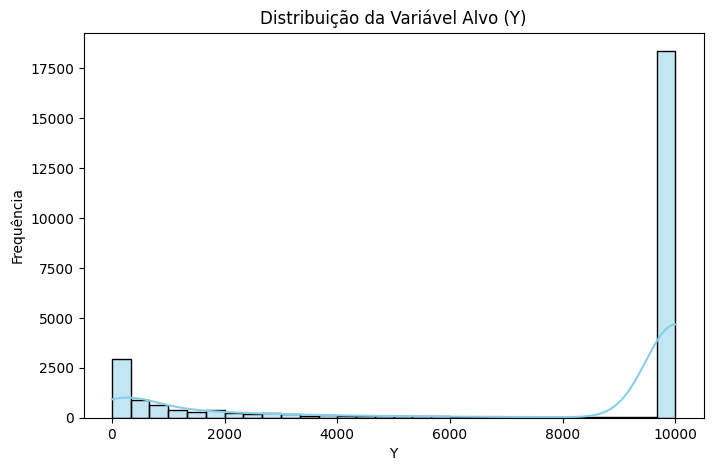

In [11]:
# Histograma da variável Y
plt.figure(figsize=(8, 5))
sns.histplot(df['Y'], bins=30, kde=True, color='skyblue')
plt.title("Distribuição da Variável Alvo (Y)")
plt.xlabel("Y")
plt.ylabel("Frequência")
plt.show()

A variável "Y" representa o Kd, **onde quanto menor mais forte** é a interação. Com o histograma é possível verificar que a maior parte das interações são fracas.

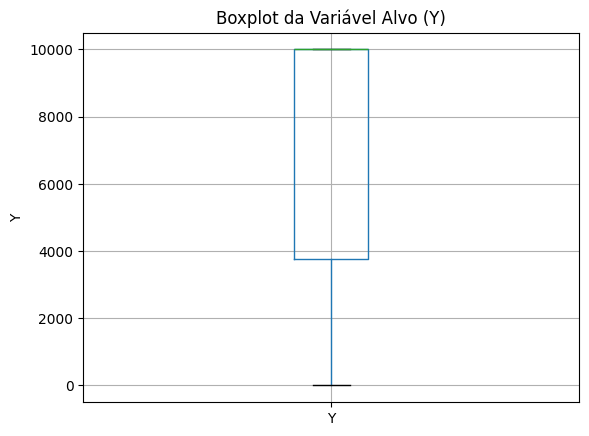

In [12]:
# Verificação de outliers
boxplot = df.boxplot(column=['Y'])
plt.title("Boxplot da Variável Alvo (Y)")
plt.ylabel("Y")
plt.show() ## Não há

##### Análise do número de interação entre alvo-fármaco

In [13]:
## Análise das estatísticas do dataset
data.print_stats()

--- Dataset Statistics ---
68 unique drugs.
379 unique targets.
25772 drug-target pairs.
--------------------------


No dataset em estudo, cada linha representa uma interação entre droga e alvo. Considerando que o total de pares possíveis é dado pela multiplicação do número de drogas (68) pelo número de alvos (379), pode-se concluir que todas as interações possíveis foram analisadas neste dataset.

In [14]:
## Confirmação que todas as interações possíveis foram testadas.
# 1. Verificar o número de interações (número de linhas no dataset)
num_interactions = len(df)
print(f'Número de interações: {num_interactions}')

# 2. Verificar o número de interações por droga
interactions_per_drug = df['Drug'].value_counts()
print(f'Número de interações por droga:\n{interactions_per_drug}')

# 3. Verificar se todas as drogas têm o mesmo número de interações
all_same_interactions = interactions_per_drug.nunique() == 1
if all_same_interactions:
    print('Todas as drogas têm o mesmo número de interações.')
else:
    print('As drogas têm números diferentes de interações.')

# 4. Verificar o total de interações possíveis
num_drugs = len(df['Drug'].unique())  # Número de drogas únicas
num_targets = len(df['Target'].unique())  # Número de alvos únicos
total_possible_interactions = num_drugs * num_targets
print(f'Número total de interações possíveis (drogas * alvos): {total_possible_interactions}')

Número de interações: 25772
Número de interações por droga:
Drug
Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12                                     379
CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(Cl)cc23)c1F                              379
N#CCC(C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1.O=P(O)(O)O                               379
CN(C)CC1CCn2cc(c3ccccc32)C2=C(C(=O)NC2=O)c2cn(c3ccccc23)CCO1                      379
COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)NC(=O)C(C)(C)O4)n2)cc(OC)c1OC.O=S(=O)(O)c1ccccc1    379
                                                                                 ... 
CN1CCN(C(=O)c2cc3cc(Cl)ccc3[nH]2)CC1                                              379
O=C(c1ccc(C=Cc2n[nH]c3ccccc23)cc1)N1CCNCC1                                        379
CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2)o1              379
CC12OC(CC1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O                          379
Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1                                     

In [15]:
## -> A farmaco que em  geral apresentou melhores interações
mean_kd_per_drug = df.groupby('Drug_ID')['Y'].mean().reset_index()
mean_kd_per_drug.columns = ['Drug_ID', 'Mean_Kd']

drug_with_lowest_kd = mean_kd_per_drug.sort_values(by='Mean_Kd').iloc[0]
# Exibindo a farmaco com o menor Mean_Kd
print("Droga com o menor valor médio de Kd:")
print(drug_with_lowest_kd)

## -> Melhor interação registada
best_interaction = df.iloc[df["Y"].idxmin()]
best_interaction_triplet = (best_interaction["Drug_ID"], best_interaction["Target_ID"], best_interaction["Y"])
print("\nMelhor interação registada:")
print(best_interaction_triplet)

Droga com o menor valor médio de Kd:
Drug_ID    44259.000000
Mean_Kd     1160.203868
Name: 1, dtype: float64

Melhor interação registada:
(3062316, 'ABL1p', 0.016)


Quanto menor o Kd melhor a interação entre alvo-fármaco. O fármaco 44259 apresentou em média um melhor desempenho. A melhor interação foi entre o fármaco **3062316** e alvo **ABL1p**.

##### Análise do comprimento dos SMILES

Como  'Drug' é uma representação SMILES, é útil verificar a distribuição do comprimento dessas strings, para ajudar a entender a complexidade das moléculas:

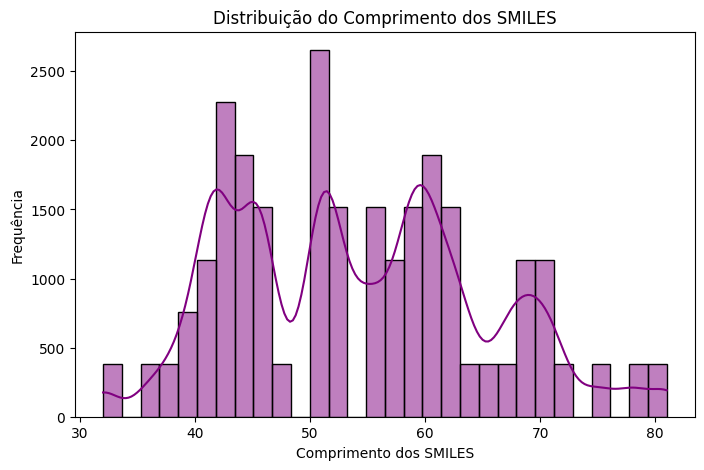


Estatísticas do Comprimento dos SMILES:
count    25772.000000
mean        54.176471
std         10.962637
min         32.000000
25%         45.000000
50%         53.000000
75%         61.250000
max         81.000000
Name: SMILES_Length, dtype: float64


In [16]:
# Calcular comprimento dos SMILES
df['SMILES_Length'] = df['Drug'].apply(len)

# Visualizar a distribuição dos comprimentos
plt.figure(figsize=(8, 5))
sns.histplot(df['SMILES_Length'], bins=30, kde=True, color='purple')
plt.title("Distribuição do Comprimento dos SMILES")
plt.xlabel("Comprimento dos SMILES")
plt.ylabel("Frequência")
plt.show()

# Estatísticas básicas
print("\nEstatísticas do Comprimento dos SMILES:")
print(df['SMILES_Length'].describe())


A análise sugere que o dataset contém moléculas de complexidades variadas, com dois grupos principais de moléculas diferenciados pelo comprimento de suas representações SMILES. A média de 54 caracteres com um desvio padrão moderado indica que os comprimentos estão razoavelmente distribuídos em torno dessa média.

##### Relatório da Exploração Inicial

- A análise da distribuição dos valores de Y, realizada através da estatística descritiva e análise gráfica, evidencia uma ampla dispersão dos dados, que apresentam diferentes ordens de grandeza. Considerando a recomendação de processamento presente no próprio repositório, sugere-se a aplicação de uma transformação logarítmica para aprimorar a análise dos valores, garantindo mais estabilidade aos modelos de previsão;

- Todas os fármacos apresentam o mesmo número de interações com os alvos, o que pode influenciar o desempenho do modelo de ML. Essa uniformidade pode facilitar o aprendizado de padrões básicos, mas também pode limitar a capacidade do modelo de captar relações mais sutis que impactam a constante Kd;

- Modelos não supervisionados ou de análise exploratória podem ser usados para entender como as interações e as características dos fármacos afetam os valores de Kd antes de treinar modelos de previsão.

- Os features Drug e Target estão em representações SMILES e sequências de aminoácidos, respectivamente. Para análises de ML e deep learning é preciso transformar esses features em formatos numéricos para que os modelos possam entender, uma vez que não operam diretamente em strings.

### 1.3) Processamento dos dados

In [17]:
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
from rdkit import Chem
from rdkit.Chem import AllChem
#from transformers import BertTokenizer, BertModel
#import torch
import numpy as np
import networkx as nx
import seaborn as sns

#### Transformação logarítmica da variável "Y"

In [18]:
## Transformação logarítmica do "Y":
data = DTI(name = 'DAVIS')
data.convert_to_log(form = 'binding')

Found local copy...
Loading...
Done!
To log space...


In [19]:
# Extrair os dados após a conversão da variável Y.
df = data.get_data()
df

Drug_ID                                           Drug Target_ID  \
0      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12      AAK1   
1      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12     ABL1p   
2      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12      ABL2   
3      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12     ACVR1   
4      11314340  Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12    ACVR1B   
...         ...                                            ...       ...   
25767    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1       YES   
25768    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1      YSK1   
25769    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1      YSK4   
25770    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1       ZAK   
25771    151194         Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1     ZAP70   

                                                  Target         Y  
0      MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...  7.365523  
1      PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...  4.999996  
2      MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...  4.999996  
3      MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...  4.999996  
4      MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...  4.999996  
...                                                  ...       ...  
25767  MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...  4.999996  
25768  MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...  4.999996  
25769  MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...  5.721224  
25770  MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...  5.356537  
25771  MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGY...  4.999996  

[25772 rows x 5 columns]

Após a transformação logarítmica, o Y que representava o Kd, torna-se pKd. Neste caso, **quanto maior o pKd melhor é a interação fármaco-alvo**.

#### Adição de variáveis categóricas no dataset

Adicionar variáveis categórias auxilia nas análises supervisionadas e na tentativa de entender padrões nos dados.

##### Classificação das quinases

As quinases podem ser "Tyrosine-protein kinase", "Serine/threonine-protein kinase" ou ambos. Os diferentes tipos se referem a que tipo de proteína a quinase é capaz de fosforilar (https://www.cusabio.com/c-16643.html, acessado em 01/2025).

In [21]:
# Determinação dos IDs únicos e sua sequência de aa correspondente
unique_targets = df[['Target_ID', 'Target']].drop_duplicates(subset=['Target_ID', 'Target'])
print(unique_targets)

    Target_ID                                             Target
0        AAK1  MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...
1       ABL1p  PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
2        ABL2  MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...
3       ACVR1  MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...
4      ACVR1B  MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...
..        ...                                                ...
374       YES  MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...
375      YSK1  MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...
376      YSK4  MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...
377       ZAK  MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...
378     ZAP70  MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGY...

[379 rows x 2 columns]


In [22]:
# Busca da classificação no UniProt (demora um pouco= 4min 38s)
import requests

proteins = [X for X in unique_targets['Target_ID']]
m_function = {}
for protein in proteins:
  entry_url = "https://rest.uniprot.org/uniprotkb/{}_HUMAN.json".format(protein)

  # Realizar a requisição
  response = requests.get(entry_url)

  # Verificar o status da requisição
  if response.status_code == 200:
      data = response.json()

  for item in data.get("keywords"):
    if item["category"] == 'Molecular function':
      if len(item["name"].split()) > 1 and "kinase" in item["name"]:
        m_function[protein] = item["name"]

m_function

{'AAK1': 'Serine/threonine-protein kinase',
 'ABL1p': 'Serine/threonine-protein kinase',
 'ABL2': 'Tyrosine-protein kinase',
 'ACVR1': 'Serine/threonine-protein kinase',
 'ACVR1B': 'Serine/threonine-protein kinase',
 'ACVR2A': 'Serine/threonine-protein kinase',
 'ACVR2B': 'Serine/threonine-protein kinase',
 'ACVRL1': 'Serine/threonine-protein kinase',
 'AKT1': 'Serine/threonine-protein kinase',
 'AKT2': 'Serine/threonine-protein kinase',
 'AKT3': 'Serine/threonine-protein kinase',
 'ALK': 'Tyrosine-protein kinase',
 'AMPK-alpha1': 'Tyrosine-protein kinase',
 'AMPK-alpha2': 'Tyrosine-protein kinase',
 'ANKK1': 'Serine/threonine-protein kinase',
 'ARK5': 'Serine/threonine-protein kinase',
 'ASK1': 'Serine/threonine-protein kinase',
 'ASK2': 'Serine/threonine-protein kinase',
 'AURKA': 'Serine/threonine-protein kinase',
 'AURKB': 'Serine/threonine-protein kinase',
 'AURKC': 'Serine/threonine-protein kinase',
 'AXL': 'Serine/threonine-protein kinase',
 'BIKE': 'Serine/threonine-protein kin

In [23]:
len(m_function) ## Devia ter 379 alvos, significa que a requisição não foi bem sucedida ou a entrada não tinha o pedido

348

In [24]:
# Identifcar os IDs que não foram classificados
for x in unique_targets["Target_ID"]:
  if x not in m_function.keys():
    print(x)

ADCK3
ADCK4
CASK
CDC2L1
CDC2L2
CDC2L5
CDK11
DLK
EPHB6
FLT1
FLT3(R834Q)
IRAK3
MINK
MKK7
MST1
MST1R
MST2
MST3
NDR1
NDR2
OSR1
p38-alpha
p38-beta
p38-delta
p38-gamma
PRP4
PYK2
SYK
TAK1
TNK2
TNNI3K


In [25]:
# Definir uma função para atualização manual dos IDs faltantes
def update_dict(protein, category):
  m_function[protein] = category
  return len(m_function)

Foi determinado a classificação dos IDs faltantes por busca manual na UniProt.

In [26]:
update_dict("p38-alpha","Serine/threonine-protein kinase")
update_dict("p38-beta", "Serine/threonine-protein kinase")
update_dict("p38-gamma", "Serine/threonine-protein kinase")
update_dict("CDC2L1", "Serine/threonine-protein kinase")
update_dict("CDC2L2", "Serine/threonine-protein kinase")
update_dict("CDC2L5", "Serine/threonine-protein kinase")
update_dict("CDK11", "Serine/threonine-protein kinase")
update_dict("MKK7", ["Serine/threonine-protein kinase", "Tyrosine-protein kinase"])
update_dict("MST1", "Serine/threonine-protein kinase")
update_dict("MST1R", "Tyrosine-protein kinase")
update_dict("MST2", "Serine/threonine-protein kinase")
update_dict("MST3", "Serine/threonine-protein kinase")
update_dict("NDR2", "Serine/threonine-protein kinase")
update_dict("SYK", "Tyrosine-protein kinase")
update_dict("TAK1", "Serine/threonine-protein kinase")
update_dict("TNK2", "Tyrosine-protein kinase")
update_dict("TNNI3K", "Serine/threonine-protein kinase")
update_dict("EPHB6", "Tyrosine-protein kinase")
update_dict("MINK", "Serine/threonine-protein kinase")
update_dict("PRP4", "Serine/threonine-protein kinase")
update_dict("PYK2", "Tyrosine-protein kinase")
update_dict("ADCK3", "Serine/threonine-protein kinase")
update_dict("ADCK4", "Serine/threonine-protein kinase")
update_dict("CASK", ["Serine/threonine-protein kinase", "Tyrosine-protein kinase"])
update_dict("p38-delta", "Serine/threonine-protein kinase")
update_dict("DLK", "Serine/threonine-protein kinase")
update_dict("FLT1", "Tyrosine-protein kinase")
update_dict("FLT3", "Tyrosine-protein kinase")
update_dict("IRAK3", "Serine/threonine-protein kinase")
update_dict("NDR1", "Serine/threonine-protein kinase")
update_dict("OSR1", "Serine/threonine-protein kinase")

379

In [27]:
# Transformar o dicionário em dataframe
import pandas as pd
df_kinase_classification = pd.DataFrame(list(m_function.items()), columns=['Target_ID', 'Kinase_Classification'])
df_kinase_classification

Target_ID            Kinase_Classification
0        AAK1  Serine/threonine-protein kinase
1       ABL1p  Serine/threonine-protein kinase
2        ABL2          Tyrosine-protein kinase
3       ACVR1  Serine/threonine-protein kinase
4      ACVR1B  Serine/threonine-protein kinase
..        ...                              ...
374      FLT1          Tyrosine-protein kinase
375      FLT3          Tyrosine-protein kinase
376     IRAK3  Serine/threonine-protein kinase
377      NDR1  Serine/threonine-protein kinase
378      OSR1  Serine/threonine-protein kinase

[379 rows x 2 columns]

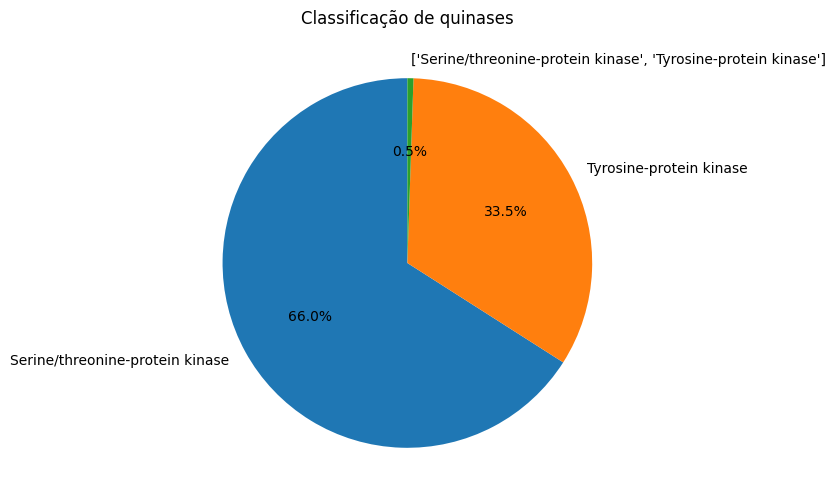

In [28]:
## Verificar a frequência das diferentes classificações
frequencia = df_kinase_classification['Kinase_Classification'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(frequencia, labels=frequencia.index, autopct='%1.1f%%', startangle=90)
plt.title('Classificação de quinases')
plt.show() # Serine/threonine-protein kinase domina os tipos de alvos

##### Definição da espécie molecular

Uma variável categórica foi criada referente a informação dos fármacos, foi definido a espécie molecular do composto (base, neutro ou ácido). Para tal foi utilizado a biblioteca RDKit. A espécie molecular foi definida pela estrutura (SMILES) do composto.

In [29]:
unique_drugs = df[['Drug_ID', 'Drug']].drop_duplicates(subset=['Drug_ID', 'Drug'])
print(unique_drugs)

        Drug_ID                                               Drug
0      11314340      Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12
379    24889392  CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...
758    11409972  CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)...
1137   11338033       O=C(NC1CCNCC1)c1[nH]ncc1NC(=O)c1c(Cl)cccc1Cl
1516   10184653  CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...
...         ...                                                ...
23877   5494449  Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)...
24256   3038525     O=c1ncn2nc(Sc3ccc(F)cc3F)ccc2c1-c1c(Cl)cccc1Cl
24635   3081361      COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1
25014   9809715  COC(=O)c1ccc2c(c1)NC(=O)C2=C(Nc1ccc(N(C)C(=O)C...
25393    151194             Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1

[68 rows x 2 columns]


In [30]:
# Requisitar a informação usando a API chEMBL (demorou 3m56s)
import requests

dict_molecular_species = {}

for index, row in unique_drugs.iterrows():
    drug_id = row['Drug_ID']
    smile = row['Drug']
    similarity = 70
    url = f"https://www.ebi.ac.uk/chembl/api/data/similarity/{smile}/{similarity}"
    headers = {"Accept": "application/json"}  # Solicitar retorno em formato JSON

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Verifica se houve erro HTTP (status != 200)

        # Tentar interpretar como JSON
        data = response.json()

        # Extrair compostos
        compounds = data.get("molecules", [])
        if compounds:  # Verificar se existem compostos
            c = compounds[0]
            # Verificar a existência de "molecule_properties" e "molecular_species"
            molecular_species = c.get("molecule_properties", {}).get("molecular_species")
            if molecular_species:
                dict_molecular_species[drug_id] = molecular_species
    except requests.exceptions.RequestException as e:
        pass
    except ValueError:
        pass
    except Exception as e:
        pass


In [31]:
len(dict_molecular_species) ## Devia ter 68 compostos, significa que a requisição não foi bem sucedida ou a entrada não tinha o pedido

60

In [32]:
for x in unique_drugs["Drug_ID"]:
  if x not in dict_molecular_species.keys():
    result = unique_drugs.loc[unique_drugs["Drug_ID"] == x, "Drug"].values[0]
    print(x, result)

11338033 O=C(NC1CCNCC1)c1[nH]ncc1NC(=O)c1c(Cl)cccc1Cl
5328940 COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc23)c(Cl)cc1Cl
176870 C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1
16725726 CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCC3CCCNC3)c21
9915743 CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2cc1NC(=O)C=CCN(C)C
25127112 N#CCC(C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1.O=P(O)(O)O
9926791 CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12
3038525 O=c1ncn2nc(Sc3ccc(F)cc3F)ccc2c1-c1c(Cl)cccc1Cl


In [33]:
## Para as que estavam em falta, foi pesquisado uma por uma no chEMBL, os que não apresentavam informação ficavam NONE.
from pickle import NONE
dict_molecular_species[11338033] = "BASE"
dict_molecular_species[5328940] = "NEUTRAL"
dict_molecular_species[176870] = "NEUTRAL"
dict_molecular_species[16725726] = "BASE"
dict_molecular_species[9915743] = "BASE"
dict_molecular_species[25127112] = NONE
dict_molecular_species[9926791] = "NEUTRAL"
dict_molecular_species[3038525] = NONE

In [34]:
df_molecular_species = pd.DataFrame(list(dict_molecular_species.items()), columns=['Drug_ID', 'Molecular_species'])
df_molecular_species

Drug_ID Molecular_species
0   11314340              BASE
1   24889392           NEUTRAL
2   11409972           NEUTRAL
3   10184653              BASE
4    5287969           NEUTRAL
..       ...               ...
63  16725726              BASE
64   9915743              BASE
65  25127112              b'N'
66   9926791           NEUTRAL
67   3038525              b'N'

[68 rows x 2 columns]

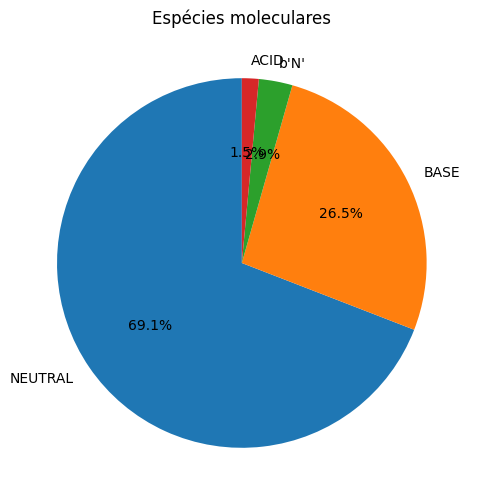

In [35]:
## Verificar a frequência das diferentes espécies moleculares
frequencia = df_molecular_species['Molecular_species'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(frequencia, labels=frequencia.index, autopct='%1.1f%%', startangle=90)
plt.title('Espécies moleculares')
plt.show() # Drogas neutras são mais prevalentes no dataset

##### Determinação de classe para os valores de Y

Os valores de pKd podem ser divididas em 3 classes pela força de interação.

In [36]:
## A determinação das categorias foram definidas com base em artigos (10.1021/acs.jcim.3c01208, 10.1002/jcc.20893)
def categorize_pKd(pKd):
    if pKd < 6:
        return 'Low'
    elif 6 <= pKd < 8:
        return 'Medium'
    else:
        return 'High'

df["Affinity_Group"] = df['Y'].apply(categorize_pKd)
print(df[['Target_ID', 'Y', 'Affinity_Group']].head())

  Target_ID         Y Affinity_Group
0      AAK1  7.365523         Medium
1     ABL1p  4.999996            Low
2      ABL2  4.999996            Low
3     ACVR1  4.999996            Low
4    ACVR1B  4.999996            Low


#### Conversão dos dados SMILES em dados numéricos

Os Morgan Fingerprints são um tipo de impressão digital molecular utilizada em bioinformática para representar estruturas químicas. Codificam informações sobre as caraterísticas estruturais das moléculas num vetor binário, permitindo a comparação e análise eficientes de compostos químicos (Zhong and Guan, 2023).

In [37]:
# Converte dados SMILES em dados numéricos (Morgan Fingerprints)
def smiles_to_MF(smiles, radius=4, n_bits=512):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(n_bits)  # Retorna um vetor de zeros se a molécula não for válida
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits))

# Aplica a função na coluna Drug
data_Drug = np.array([smiles_to_MF(smiles) for smiles in df['Drug']])
data_Drug

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
## Avaliar as métricas da conversão dos SMILES com Morgan fingerprints
invalid_smiles_count = sum(Chem.MolFromSmiles(smiles) is None for smiles in df['Drug'])
print(f"Quantidade de SMILES inválidos: {invalid_smiles_count}")

Quantidade de SMILES inválidos: 0


#### Conversão das sequências de aminoácidos do alvo

Com o obejtivo de agregar mais informação no dataset, foi realizada a transformação das sequências de aminoácidos das proteínas em embeddings.

**Embeddings** são utilizados para converter sequências de proteínas e estruturas químicas em vetores numéricos, facilitando a sua utilização em métodos computacionais. Assim sendo, foi utilizado o modelo ProtBERT, que captura padrões biológicos e semânticos das sequências de proteínas.

In [ ]:
# Carregar o ProtBERT pré-treinado
#from transformers import AutoTokenizer, AutoModel
#import torch

# tokenizer = AutoTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
# model = AutoModel.from_pretrained("Rostlab/prot_bert")

# # Colocar o modelo em modo de inferência
# model.eval()

# # Função para gerar embeddings
# def generate_protbert_embedding(sequence):

#     spaced_sequence = " ".join(sequence)

#     # Tokenizar a sequência
#     tokens = tokenizer(spaced_sequence, return_tensors="pt", add_special_tokens=True)

#     # Gerar os embeddings
#     with torch.no_grad():
#         outputs = model(**tokens)

#     # Usar a média dos embeddings de todas as camadas
#     embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
#     return embeddings


In [39]:
unique_targets = df[['Target_ID', 'Target']].drop_duplicates(subset=['Target_ID', 'Target'])
print(unique_targets)

    Target_ID                                             Target
0        AAK1  MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...
1       ABL1p  PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
2        ABL2  MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...
3       ACVR1  MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...
4      ACVR1B  MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...
..        ...                                                ...
374       YES  MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...
375      YSK1  MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...
376      YSK4  MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...
377       ZAK  MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...
378     ZAP70  MPDPAAHLPFFYGSISRAEAEEHLKLAGMADGLFLLRQCLRSLGGY...

[379 rows x 2 columns]


In [ ]:
# dict_embeddings = {}

# for index, row in unique_targets.iterrows():
#     target_id = row['Target_ID']
#     sequence = row['Target']
#     dict_embeddings[target_id] = generate_protbert_embedding(sequence)

In [ ]:
#fazer o download do csv. Uma fez que a obtenção de embeddings é demorada vamos usar o documento csv e não reporduzir o processo toda vez.
# from google.colab import files

# # Converter os embeddings para DataFrame
# data = [(target_id, embedding.tolist()) for target_id, embedding in dict_embeddings.items()]
# df_embeddings = pd.DataFrame(data, columns=['Target_ID', 'Embeddings'])

# # Salvar o DataFrame em um arquivo CSV
# df_embeddings.to_csv('embeddings_targets.csv', index=False)

# # Fazer o download do arquivo CSV
# files.download('embeddings_targets.csv')

In [40]:
## Importar o csv com os embeddings
from google.colab import files

# Carregar o arquivo CSV
uploaded = files.upload()
df_embeddings = pd.read_csv('embeddings_targets.csv')

# Exibir as primeiras linhas do dataframe
df_embeddings.head()

Saving embeddings_targets.csv to embeddings_targets.csv


Target_ID                                         Embeddings
0      AAK1  [0.15718942880630493, 0.013413864187896252, -0...
1     ABL1p  [0.13038086891174316, -0.013016059063374996, 0...
2      ABL2  [0.1386459618806839, 0.004535922314971685, 0.0...
3     ACVR1  [0.14593058824539185, 0.09494800120592117, -0....
4    ACVR1B  [0.20122450590133667, 0.06451524049043655, -0....

#### Junção dos features ao dataset

In [41]:
from sklearn.preprocessing import StandardScaler
import ast
import matplotlib.pyplot as plt

Todas as novas features foram integradas no dataset original. Para análise, features como "Drug" e "Target" não foram mantidas, uma vez que não serão analisadas nas próximas etapas.

In [42]:
df_final = df.copy()
print(df_final.columns)
df_final = df_final.drop(columns=['Drug', 'Target'])
df_final.columns

Index(['Drug_ID', 'Drug', 'Target_ID', 'Target', 'Y', 'Affinity_Group'], dtype='object')


Index(['Drug_ID', 'Target_ID', 'Y', 'Affinity_Group'], dtype='object')

In [43]:
# Os embaddings são str, nesse caso precisamos colocar como listas
df_embeddings['Embeddings'].apply(type).head()

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
Name: Embeddings, dtype: object

In [44]:
# Converter strings para listas numéricas
df_embeddings['Embeddings'] = df_embeddings['Embeddings'].apply(ast.literal_eval)

print(df_embeddings['Embeddings'].apply(type).head())
all_strings = df_embeddings['Embeddings'].apply(lambda x: all(isinstance(item, str) for item in x))
print(all_strings)

0    <class 'list'>
1    <class 'list'>
2    <class 'list'>
3    <class 'list'>
4    <class 'list'>
Name: Embeddings, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
374    False
375    False
376    False
377    False
378    False
Name: Embeddings, Length: 379, dtype: bool


In [45]:
# Normalizar os embeddings
embedding_matrix = np.array(df_embeddings['Embeddings'].tolist())

scaler = StandardScaler()
normalized_embeddings = scaler.fit_transform(embedding_matrix)

df_embeddings['Embeddings_Normalized'] = list(normalized_embeddings)

print(df_embeddings.head())

  Target_ID                                         Embeddings  \
0      AAK1  [0.15718942880630493, 0.013413864187896252, -0...   
1     ABL1p  [0.13038086891174316, -0.013016059063374996, 0...   
2      ABL2  [0.1386459618806839, 0.004535922314971685, 0.0...   
3     ACVR1  [0.14593058824539185, 0.09494800120592117, -0....   
4    ACVR1B  [0.20122450590133667, 0.06451524049043655, -0....   

                               Embeddings_Normalized  
0  [0.7154215526526114, -1.1499858206963114, -1.4...  
1  [0.24317519141725616, -1.9762939242340594, 1.0...  
2  [0.3887689903831586, -1.4275467974192315, 1.12...  
3  [0.5170913735034212, 1.3991066413754636, -1.18...  
4  [1.491121739706132, 0.4476533755767956, -0.170...  


In [46]:
# Unir os features
df_final["Drug_MF"] = data_Drug.tolist()
df_final = pd.merge(df_final, df_embeddings[['Target_ID', 'Embeddings_Normalized']], on='Target_ID', how='left')
df_final = pd.merge(df_final, df_molecular_species, on='Drug_ID', how='left')
df_final = pd.merge(df_final, df_kinase_classification, on='Target_ID', how='left')
df_final.columns

Index(['Drug_ID', 'Target_ID', 'Y', 'Affinity_Group', 'Drug_MF',
       'Embeddings_Normalized', 'Molecular_species', 'Kinase_Classification'],
      dtype='object')

In [47]:
df_final.head()

Drug_ID Target_ID         Y Affinity_Group  \
0  11314340      AAK1  7.365523         Medium   
1  11314340     ABL1p  4.999996            Low   
2  11314340      ABL2  4.999996            Low   
3  11314340     ACVR1  4.999996            Low   
4  11314340    ACVR1B  4.999996            Low   

                                             Drug_MF  \
0  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...   
1  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...   
2  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...   
3  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...   
4  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...   

                               Embeddings_Normalized Molecular_species  \
0  [0.7154215526526114, -1.1499858206963114, -1.4...              BASE   
1  [0.24317519141725616, -1.9762939242340594, 1.0...              BASE   
2  [0.3887689903831586, -1.4275467974192315, 1.12...              BASE   
3  [0.5170913735034212, 1.3991066413754636, -1.18...              BASE   
4  [1.491121739706132, 0.4476533755767956, -0.170...              BASE   

             Kinase_Classification  
0  Serine/threonine-protein kinase  
1  Serine/threonine-protein kinase  
2          Tyrosine-protein kinase  
3  Serine/threonine-protein kinase  
4  Serine/threonine-protein kinase

In [48]:
most_frequent_molecular_species = df_final['Molecular_species'].mode()[0]
print(f"A espécie molecular mais frequente é: {most_frequent_molecular_species}")
most_frequent_kinase_classification = df_final['Kinase_Classification'].mode()[0]
print(f"A classificação mais frequente é: {most_frequent_kinase_classification}")

A espécie molecular mais frequente é: NEUTRAL
A classificação mais frequente é: Serine/threonine-protein kinase


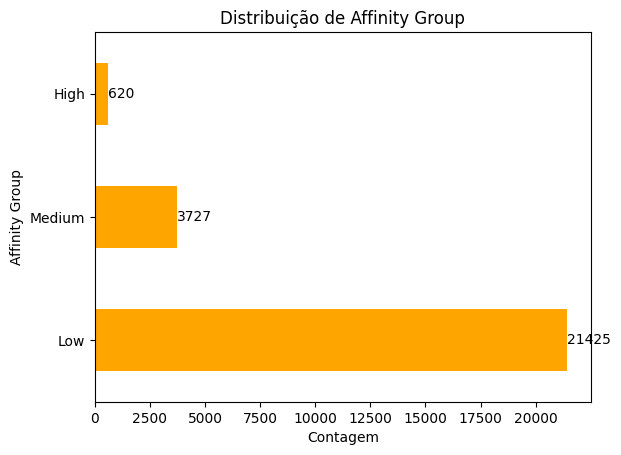

In [49]:
# Gráfico de barras das classes da variável Affinity_Group
counts = df['Affinity_Group'].value_counts()

ax = counts.plot(kind='barh', color='orange')

for i, v in enumerate(counts):
    ax.text(v + 0.2, i, str(v), va='center', color='black')

plt.title("Distribuição de Affinity Group")
plt.xlabel("Contagem")
plt.ylabel("Affinity Group")
plt.show() # 620 interações são fortes (pKd > 8)

## **2) Análise não supervisionada**


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.manifold import TSNE
from matplotlib import cm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split

### **2.1) Técnicas de redução de dimensionalidade**

##### PCA

O PCA (Análise de Componentes Principais) é uma técnica estatística usada para reduzir a dimensionalidade de um conjunto de dados, mantendo o máximo de informação possível.


In [51]:
# Verificar se as colunas são arrays numpy
df_final['Drug_MF'] = df_final['Drug_MF'].apply(lambda x: np.array(x) if not isinstance(x, np.ndarray) else x)
df_final['Embeddings_Normalized'] = df_final['Embeddings_Normalized'].apply(lambda x: np.array(x) if not isinstance(x, np.ndarray) else x)

In [52]:
## Uma vez que o dataset é de interação é interessante analisar a relação alvo-fármaco. Para tal foi combinado os features que apresentam as características dos alvos e dos fármacos
combined_features = np.array([np.hstack((drug, embedding)) for drug, embedding in zip(df_final['Drug_MF'], df_final['Embeddings_Normalized'])])

In [53]:
## Aplicação do PCA
scaler = StandardScaler()
combined_features_normalized = scaler.fit_transform(combined_features)

pca = PCA()
reduced_data = pca.fit_transform(combined_features_normalized)

In [54]:
original_shape = combined_features_normalized.shape
print(f"Dimensionalidade original: {original_shape}")

Dimensionalidade original: (25772, 1536)


In [55]:
# Identificação de quantos componentes explicam 90% da variância
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance >= 0.90) + 1  # Adicionamos 1 porque o índice começa de 0

print(f"Número de componentes para explicar 90% da variância: {n_components_90}")

Número de componentes para explicar 90% da variância: 110


In [56]:
explained_variance_ratio = pca.explained_variance_ratio_

# Variância explicada pelo primeiro e segundo componentes
pc1_variance = explained_variance_ratio[0] * 100
pc2_variance = explained_variance_ratio[1] * 100
pc3_variance = explained_variance_ratio[2] * 100

print(f"O primeiro componente principal (PC1) explica {pc1_variance:.2f}% da variância total.")
print(f"O segundo componente principal (PC2) explica {pc2_variance:.2f}% da variância total.")
print(f"O terceiro componente principal (PC3) explica {pc3_variance:.2f}% da variância total.")

O primeiro componente principal (PC1) explica 16.11% da variância total.
O segundo componente principal (PC2) explica 7.05% da variância total.
O terceiro componente principal (PC3) explica 5.03% da variância total.


In [57]:
num_drug_features = df_final['Drug_MF'].iloc[0].shape[0]
drug_features = combined_features_normalized[:, :num_drug_features]
target_features = combined_features_normalized[:, num_drug_features:]
print(f"Variância Morgan Fingerprints: {np.var(drug_features):.4f}")
print(f"Variância Embeddings: {np.var(target_features):.4f}")

Variância Morgan Fingerprints: 0.9941
Variância Embeddings: 1.0000


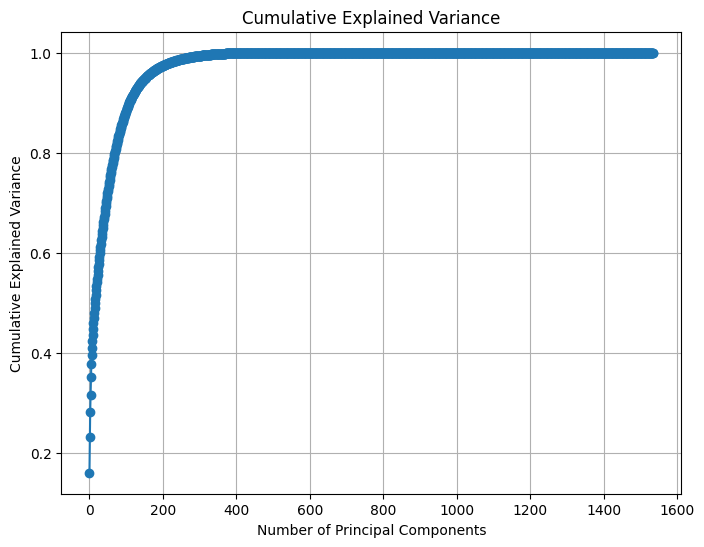

In [58]:
## Variância acumulada explicada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance_ratio, marker='o', linestyle='-')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

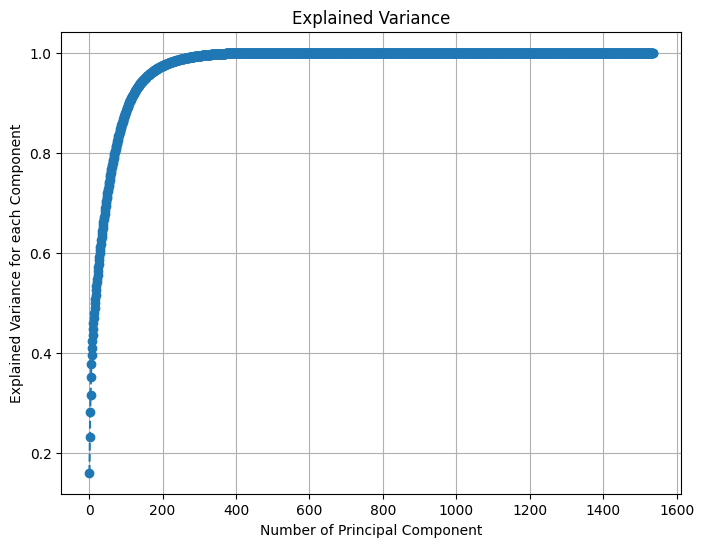

In [59]:
## Variância explicada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title("Explained Variance")
plt.xlabel("Number of Principal Component")
plt.ylabel("Explained Variance for each Component")
plt.grid(True)
plt.show()

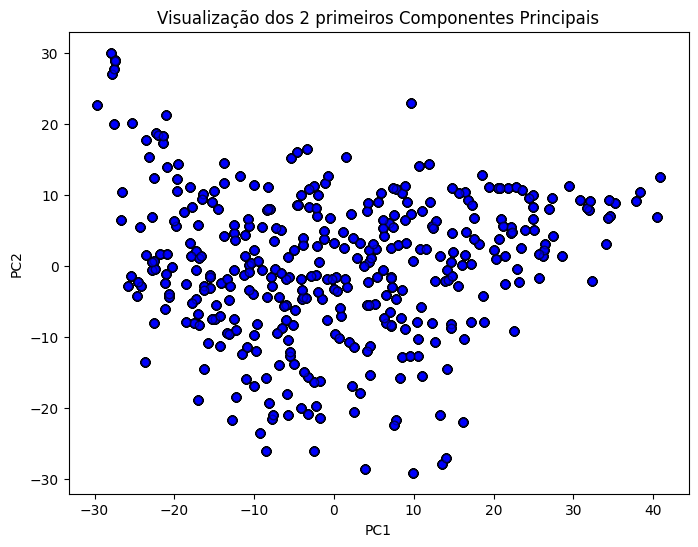

In [60]:
# Scatter plot dos 2 primeiros componentes (observar como os pontos se destribuem nos dois primeiros componentes)
reduced_data_2d = reduced_data[:, :2]

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c='blue', edgecolors='k', alpha=0.5)
plt.title("Visualização dos 2 primeiros Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Para explicar 90% são necessários 110 componentes. O número de componentes foi reduzido de 1.536 para 110. O PC1 explica 16,11% da variância total e o PC2 7,05%, onde ambos explicam 23,16% da variância total. Os dados referentes aos embeddings (alvos) apresentam uma maior contribuição na explicação da variância. Este resultado poderá ser devido à diferente natureza dos dados e pelo facto dos embeddings serem capazes de reter mais informação que os morgan fingerprints (fármacos).

**Análise dos componentes em conjunto com as variáveis categóricas**

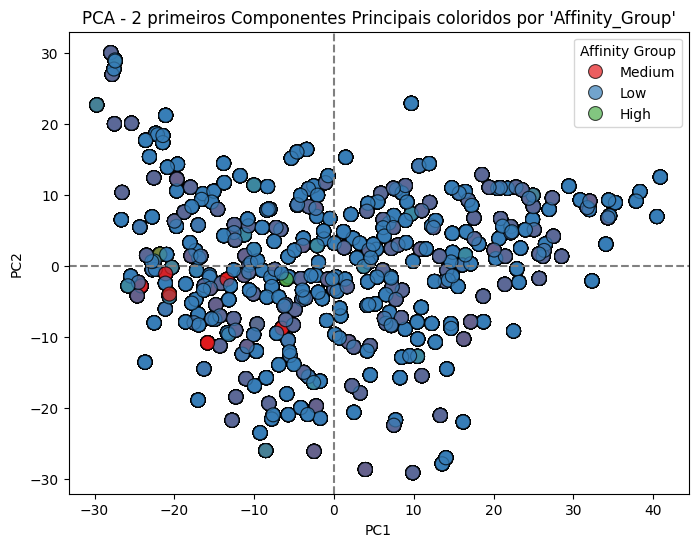

In [61]:
## Avaliação com o Affinity_Group
palette = sns.color_palette("Set1", n_colors=df_final['Affinity_Group'].nunique())

# gráfico de dispersão
plt.figure(figsize=(8, 6))

sns.scatterplot(x=reduced_data_2d[:, 0], y=reduced_data_2d[:, 1], hue=df_final['Affinity_Group'],
                palette=palette, edgecolor='k', alpha=0.7, s=100)

# quadrantes
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

plt.title("PCA - 2 primeiros Componentes Principais coloridos por 'Affinity_Group'")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Affinity Group')
plt.show()

Não há formação de clusteres, porém é possível ver uma tendência de encontrar interações médias e altas ditribuídas no terceiro quadrande da representação gráfica do PC1 e PC2.

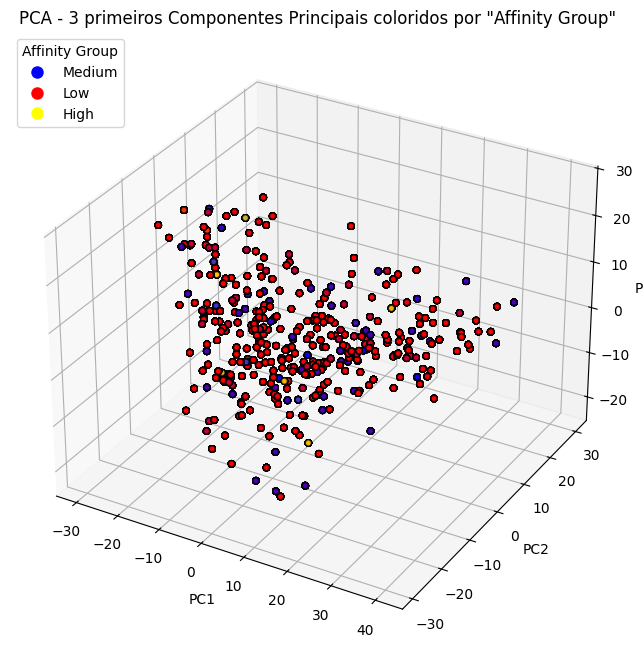

In [62]:
# Representação gráfica em 3 dimensões. Objetivo de observar se aumentando a porcentagem da variância explicada seria possível ver algum agrupamento
reduced_data_3d = reduced_data[:, :3]

# Definir cores fixas: Azul, Vermelho e Amarelo
colors = ['blue', 'red', 'yellow']

palette = dict(zip(df_final['Affinity_Group'].unique(), colors))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

affinity_group_colors = df_final['Affinity_Group'].map(palette)

# Scatterplot 3D com os três primeiros componentes principais (PC1, PC2, PC3)
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                     c=affinity_group_colors, edgecolor='k', alpha=0.7)

# Definir os rótulos dos eixos
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('PCA - 3 primeiros Componentes Principais coloridos por "Affinity Group"')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=str(group))
           for group, color in palette.items()]
ax.legend(handles=handles, title='Affinity Group', loc='upper left')
plt.show() ## Nenhum cluster foi observado


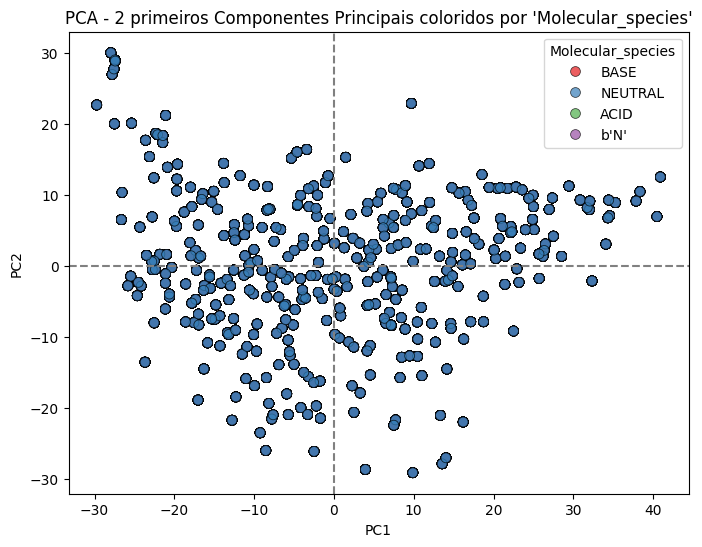

In [63]:
## Avaliação com o 'Molecular_species'
palette = sns.color_palette("Set1", n_colors=df_final['Molecular_species'].nunique())

# gráfico de dispersão
plt.figure(figsize=(8, 6))

sns.scatterplot(x=reduced_data_2d[:, 0], y=reduced_data_2d[:, 1], hue=df_final['Molecular_species'],
                palette=palette, edgecolor='k', alpha=0.7, s=50)

# quadrantes
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

plt.title("PCA - 2 primeiros Componentes Principais coloridos por 'Molecular_species'")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Molecular_species')
plt.show()


In [64]:
molecular_species_counts = df_final['Molecular_species'].value_counts()
print(molecular_species_counts)

Molecular_species
NEUTRAL    17813
BASE        6822
b'N'         758
ACID         379
Name: count, dtype: int64


No PCA gerado não é possível perceber clusters ou a presença das outras espécies moleculares. Analisando a distribuição das amostras entre as diferentes espécies moleculares, a classificação NEUTRAL é muito maior, o que causa o efeito de sobrecarga visual no gráfico. As restantes classificações não são bem explicadas em 23,16% da variância (PC1 + PC2).

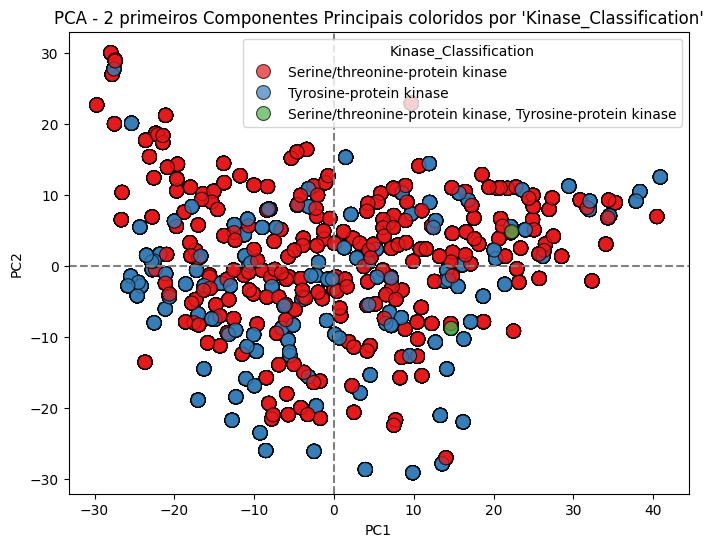

In [65]:
## Avaliação com o 'Kinase_Classification'
# Visualização dos dois componentes principais
df_final['Kinase_Classification'] = df_final['Kinase_Classification'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

palette = sns.color_palette("Set1", n_colors=df_final['Kinase_Classification'].nunique())

# gráfico de dispersão
plt.figure(figsize=(8, 6))

sns.scatterplot(x=reduced_data_2d[:, 0], y=reduced_data_2d[:, 1], hue=df_final['Kinase_Classification'],
                palette=palette, edgecolor='k', alpha=0.7, s=100)

# quadrantes
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

plt.title("PCA - 2 primeiros Componentes Principais coloridos por 'Kinase_Classification'")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Kinase_Classification')
plt.show()


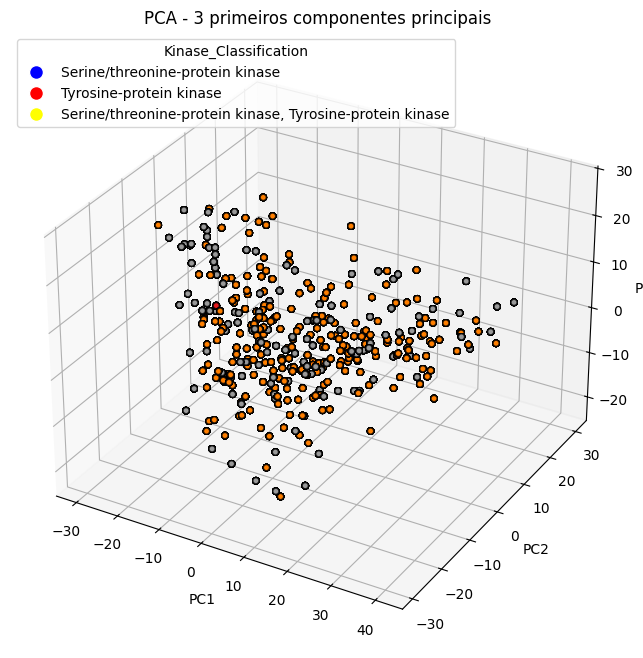

In [66]:
# Visualização dos três componentes principais
colors = ['blue', 'red', 'yellow']

palette = dict(zip(df_final['Kinase_Classification'].unique(), colors))
df_final['Kinase_Classification'].fillna('UNKNOWN', inplace=True)
affinity_group_colors = df_final['Kinase_Classification'].map(palette)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot 3D com os três primeiros componentes principais (PC1, PC2, PC3)
scatter = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                     c=affinity_group_colors.apply(lambda x: colors.index(x) if x in colors else -1),
                     cmap=plt.cm.get_cmap('Set1', len(colors)),
                     edgecolor='k', alpha=0.7)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('PCA - 3 primeiros componentes principais')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=group)
           for group, color in palette.items()]
ax.legend(handles=handles, title='Kinase_Classification', loc='upper left')
plt.show() # Sem formação de clusters.

Os dois primeiros componentes ainda não são suficientes para uma boa discriminação dos grupos, uma vez que explicam 23,16% da variância total.

Para modelos preditivos, a redução de dimensionaliadade melhora a execução dos modelos.

#####**t-SNE**
Como no PCA não obtivémos uma separação clara entre os grupos de afinidade, decidimos utilizar o t-SNE.

O t-SNE (t-Distributed Stochastic Neighbor Embedding) é uma técnica poderosa para visualização de dados de alta dimensionalidade. Este possui algumas diferenças em comparação com o PCA:

| Aspecto          | **PCA**                                            | **t-SNE**                                          |
|-------------------|---------------------------------------------------|---------------------------------------------------|
| **Tipo de Redução** | Linear                                           | Não-linear                                        |
| **Preservação**    | Foca na preservação da **variância global** dos dados. | Foca na preservação das **relações locais** entre os pontos. |
| **Componentes**    | Gera **componentes ortogonais** que explicam a variância. | Não gera componentes; cria uma nova projeção.     |
| **Velocidade**     | Muito mais rápido, eficiente em datasets grandes. | Mais lento, especialmente em datasets maiores.    |
| **Finalidade**     | Melhora a explicação da variância. | Ideal para **descobrir padrões ou clusters escondidos**. |




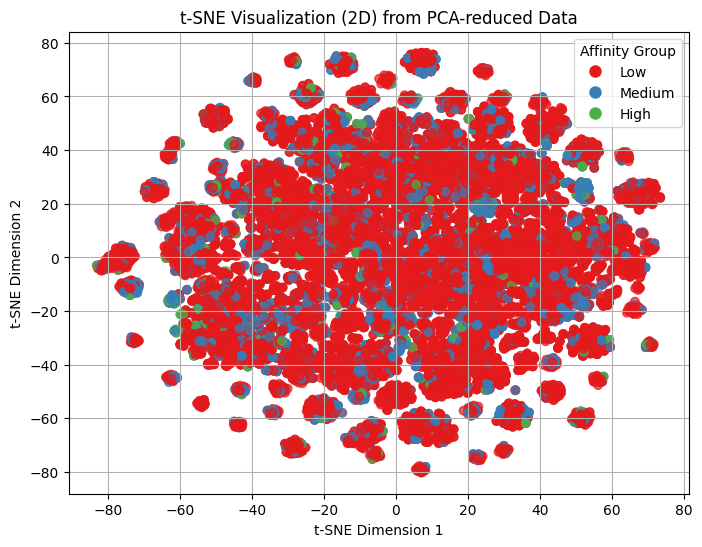

In [ ]:
# Aplicar t-SNE aos dados do PCA
palette = sns.color_palette("Set1", n_colors=3)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
data_tsne = tsne.fit_transform(reduced_data)

color_map = {'Low': palette[0], 'Medium': palette[1], 'High': palette[2]}
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_tsne[:, 0], data_tsne[:, 1],
    c=df_final['Affinity_Group'].map(color_map),
    alpha=0.7
)

plt.title('t-SNE Visualization (2D) from PCA-reduced Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
           for label, color in color_map.items()]
plt.legend(handles=handles, title='Affinity Group')
# Exibir o gráfico
plt.show()

In [ ]:
# Aplicar o t-SNE para os componentes que explicam 90% da variância dos dados
n_components_pca = n_components_90
data_for_tsne = reduced_data[:, :n_components_pca]
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
data_tsne = tsne.fit_transform(data_for_tsne)

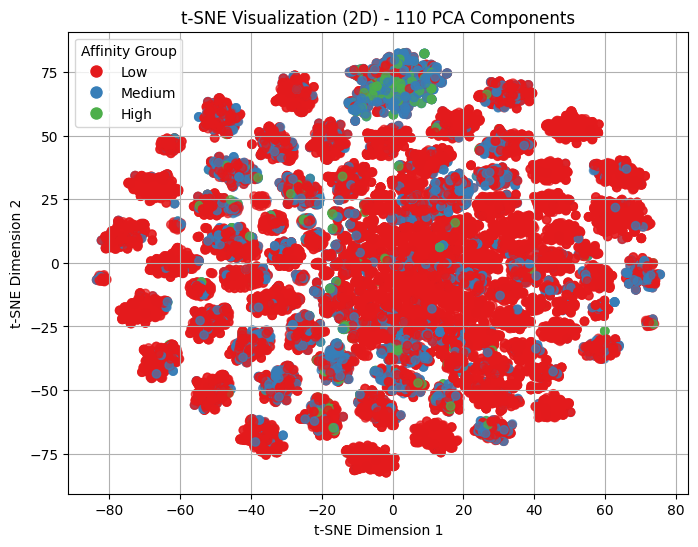

In [ ]:
# Análise por grupos de afinidade
palette = sns.color_palette("Set1", n_colors=3)

# Criar o mapa de cores para os grupos de afinidade
color_map = {'Low': palette[0], 'Medium': palette[1], 'High': palette[2]}

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_tsne[:, 0], data_tsne[:, 1],
    c=df_final['Affinity_Group'].map(color_map),
    alpha=0.7
)

plt.title('t-SNE Visualization (2D) - 110 PCA Components')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
           for label, color in color_map.items()]
plt.legend(handles=handles, title='Affinity Group')

plt.show()

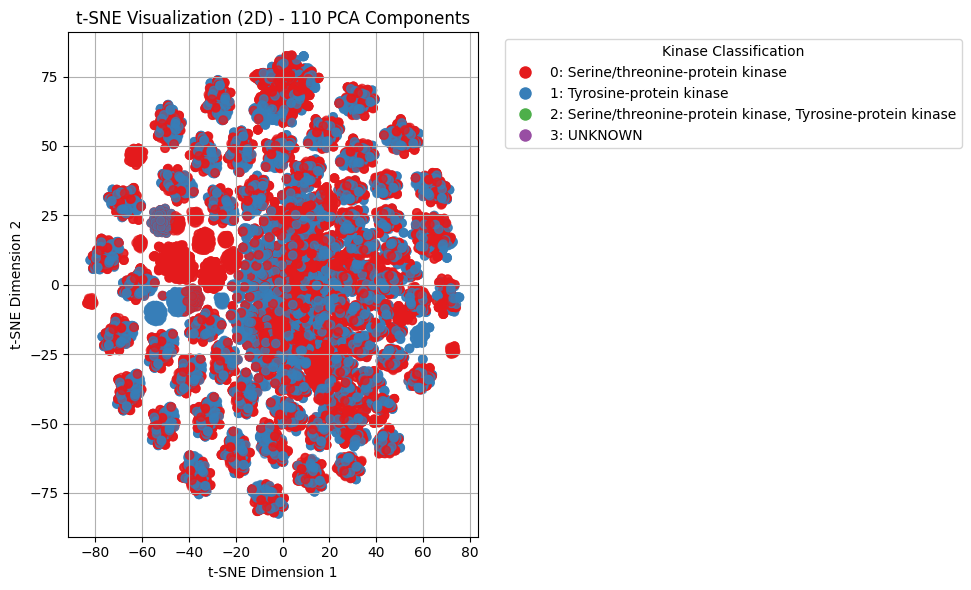

In [ ]:
# Análise por classificação de quinases
unique_classes = df_final['Kinase_Classification'].unique()
class_to_number = {cls: i for i, cls in enumerate(unique_classes)}
number_to_class = {i: cls for cls, i in class_to_number.items()}

classification_numbers = df_final['Kinase_Classification'].map(class_to_number)

palette = sns.color_palette("Set1", n_colors=len(unique_classes))
color_map = {i: palette[i] for i in range(len(unique_classes))}

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data_tsne[:, 0], data_tsne[:, 1],
    c=classification_numbers.map(color_map),
    alpha=0.7
)

plt.title('t-SNE Visualization (2D) - 110 PCA Components')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10, label=f'{i}: {number_to_class[i]}')
           for i in range(len(unique_classes))]
plt.legend(handles=handles, title='Kinase Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

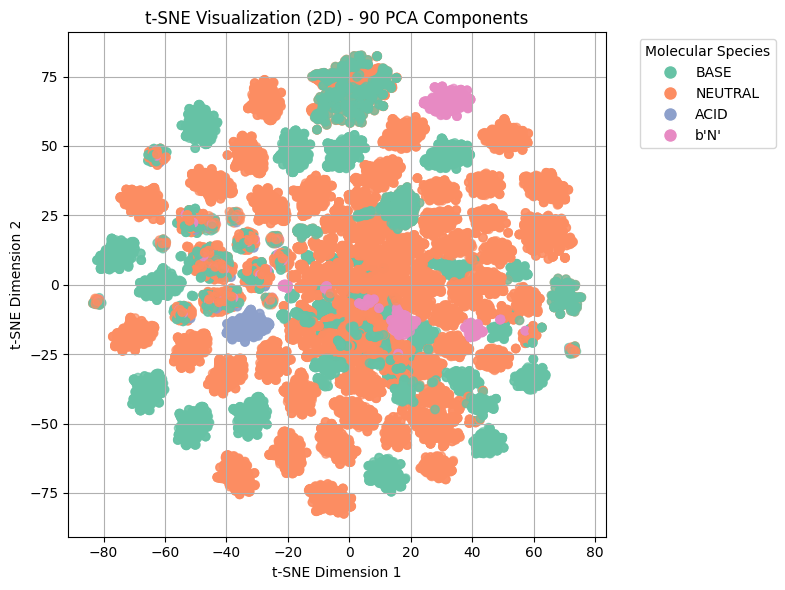

In [ ]:
# Análise por espécie molecular
palette = sns.color_palette("Set2", n_colors=4)

unique_species = df_final['Molecular_species'].unique()
color_map = {species: palette[i] for i, species in enumerate(unique_species)}

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_tsne[:, 0], data_tsne[:, 1],
    c=df_final['Molecular_species'].map(color_map),
    alpha=0.7
)

plt.title('t-SNE Visualization (2D) - 90 PCA Components')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid()

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
           for label, color in color_map.items()]
plt.legend(handles=handles, title='Molecular Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Com a análise do t-SNE, é possível detectar clusters bem definidos, o que facilita a visualização das relações de similaridade nos dados. Na análise por grupo de afinidade, observa-se uma agregação das interações correspondentes a médias e altas afinidades. Isso permite inferir que os fármacos e os alvos presentes nesses clusters compartilham características em comum, as quais podem estar relacionadas a interações mais favoráveis entre fármacos e alvos.

### **2.2) Clustering dos dados**


#####**K-Means**
Após aplicar a redução de dimensionalidade com PCA, verificamos que 90% da variância dos dados pode ser explicada com 110 componentes principais, reduzindo significativamente a dimensionalidade original de 1536 para 110. Essa redução simplifica a análise dos dados, eliminando redundâncias e facilitando a identificação de padrões.

O K-means foi aplicado aos dados reduzidos com o objetivo de identificar agrupamentos ocultos nos dados. Assim, podemos:

**Reduzir o ruído:** A redução de dimensionalidade remove informações irrelevantes ou redundantes, permitindo que o K-means opere num espaço mais significativo;

**Eficiência Computacional:** Com menos dimensões, o K-means é mais eficiente, pois reduzimos o espaço de busca para os centros dos clusters;

**Identificação de Padrões:** O PCA reorganiza as variáveis para maximizar a variância explicada nos componentes principais. Aplicar o K-means neste espaço otimizado pode revelar agrupamentos baseados nas principais fontes de variação nos dados;

**Visualização Facilitada:** Os dois primeiros componentes principais podem ser usados para visualizar os agrupamentos identificados pelo K-means em um espaço 2D, facilitando a interpretação.


O número ótimo de clusters baseado no coeficiente de silhueta é: 2


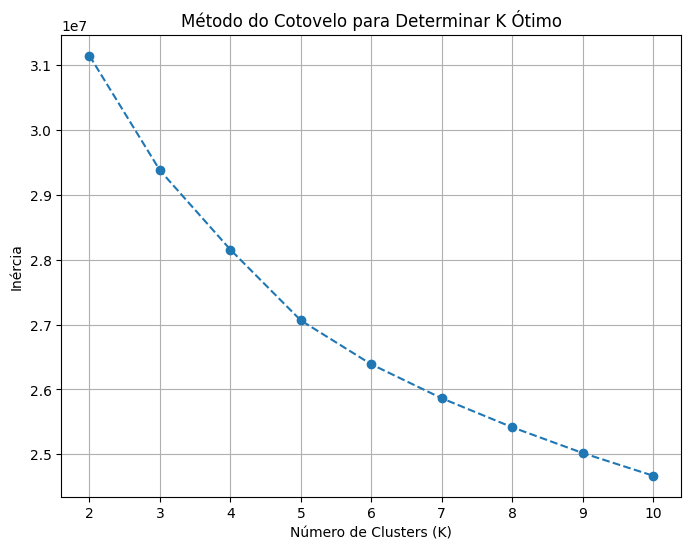

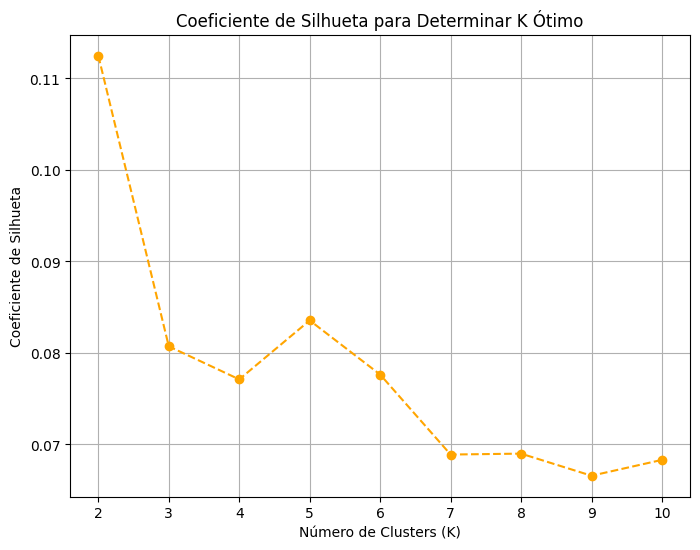

In [67]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Tentaremos de 2 a 10 clusters

# Loop para calcular métricas para cada valor de K
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data[:, :110])  # Usando os 110 componentes selecionados pelo PCA
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_data[:, :110], kmeans.labels_))

# Encontrando o K ótimo com base na silhueta
k_otimo = cluster_range[np.argmax(silhouette_scores)]
print(f"O número ótimo de clusters baseado no coeficiente de silhueta é: {k_otimo}")

# Gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Determinar K Ótimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.grid()
plt.show()

# Gráfico do coeficiente de silhueta
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Coeficiente de Silhueta para Determinar K Ótimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silhueta')
plt.grid()
plt.show()


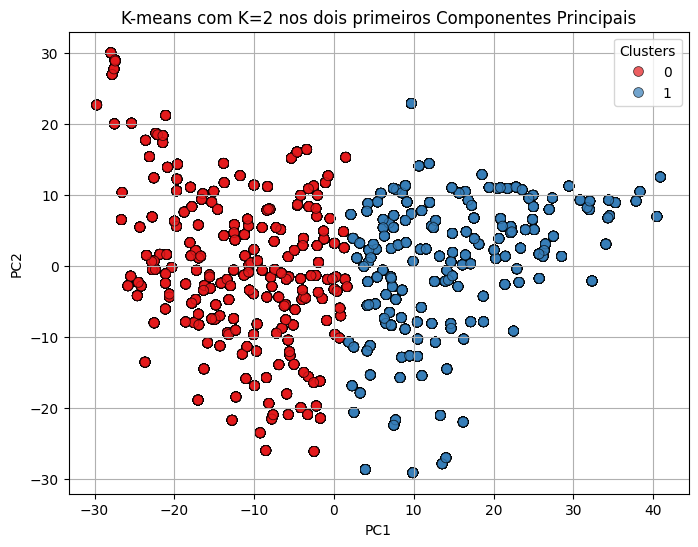

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(reduced_data[:, :110])
cluster_labels = kmeans.labels_

# Adicionar os clusters ao dataframe original
df_final['Cluster'] = cluster_labels

# Visualizar clusters nos dois primeiros componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data_2d[:, 0], y=reduced_data_2d[:, 1],
    hue=cluster_labels, palette='Set1', edgecolor='k', alpha=0.7, s=50
)
plt.title(f"K-means com K={optimal_k} nos dois primeiros Componentes Principais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Clusters')
plt.grid()
plt.show()

**PC1 (eixo X):** É o componente que separa a maioria dos pontos. É provável que este eixo capture a principal fonte de variação nos dados moleculares, diferenciando dois grandes grupos.

**PC2 (eixo Y):** Adiciona informações complementares sobre as diferenças nos dados, mas não parece ser tão determinante quanto o PC1 para a separação dos clusters.
A separação mostra que a dimensionalidade reduzida preservou bem os agrupamentos.

Essa separação pode indicar:

**Cluster 0 (vermelho):** Fármacos/proteínas que compartilham características moleculares ou funcionais específicas.

**Cluster 1 (azul):** Fármacos/proteínas com propriedades diferentes, talvez mais diversificadas.
Essa distinção pode estar relacionada com fatores como especificidade molecular (afinidade com alvos) como estruturas químicas/padrões funcionais.



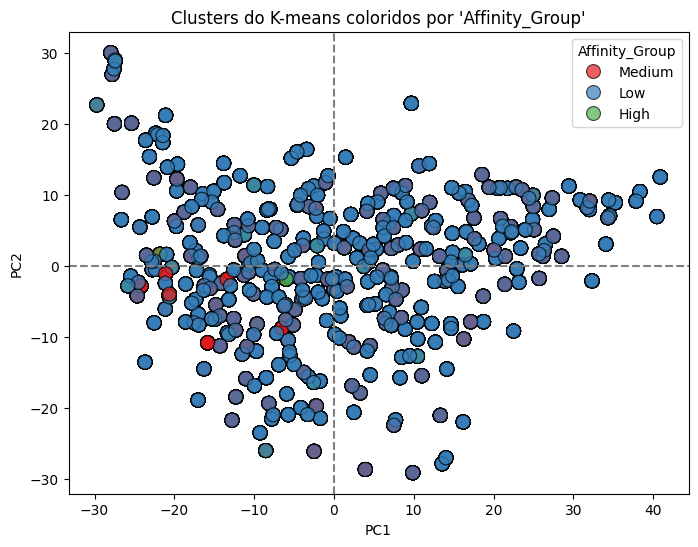

In [ ]:
optimal_k = 2
# Aplicar K-means com o número ótimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(reduced_data[:, :110])

# Adicionar os clusters do K-means ao DataFrame
df_final['KMeans_Cluster'] = kmeans.labels_

# Visualizar clusters coloridos por 'Affinity_Group'
palette = sns.color_palette("Set1", n_colors=df_final['Affinity_Group'].nunique())
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=reduced_data_2d[:, 0], y=reduced_data_2d[:, 1],
    hue=df_final['Affinity_Group'],  # Colorir pelos grupos de afinidade
    palette=palette, edgecolor='k', alpha=0.7, s=100
)

# Linhas dos quadrantes para orientação
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Títulos e legendas
plt.title("Clusters do K-means coloridos por 'Affinity_Group'")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Affinity_Group')
plt.show()

**Correlações com o 'Affinity_Group':**

Este gráfico sobrepõe as categorias Affinity_Group (High, Medium, Low) à separação dos clusters obtidos pelo K-means.
Observa-se que a maioria dos pontos no gráfico está associada ao grupo Low (azul), enquanto há poucas ocorrências de High (verde) e Medium (vermelho).

**Sobreposição entre Clusters e 'Affinity_Group':**

A separação dos clusters pelo K-means não parece estar perfeitamente alinhada com as categorias do Affinity_Group.
Isso pode significar que os agrupamentos baseados na variação latente (via PCA) capturam características que são independentes do Affinity_Group.

**Interpretação Biológica:**

A predominância do grupo Low pode indicar que, para a maioria dos casos, a afinidade entre os fármacos e os alvos é baixa.
A presença de Medium e High em regiões pontuais sugere que esses casos são mais específicos e podem corresponder a interações mais fortes ou seletivas.


Após o PCA, foi realizado o **Hierarchical Clustering (HC)** para complementar os resultados do K-Means. Ao contrário do K-Means, o HC fornece uma visão hierárquica dos agrupamentos nos dados, permitindo explorar diferentes níveis de granularidade. Um dendrograma foi gerado para visualizar as similaridades entre os dados e identificar um ponto de corte para determinar o número de clusters.

O método Ward foi usado para linkage, que minimiza a variância intra-cluster ao agrupar. Para validar os resultados do dendrograma, os clusters identificados foram comparados graficamente no espaço bidimensional dos dois primeiros componentes principais do PCA.

Os clusters gerados pelo HC podem ser comparados diretamente com os resultados do K-Means para avaliar se os agrupamentos são consistentes.

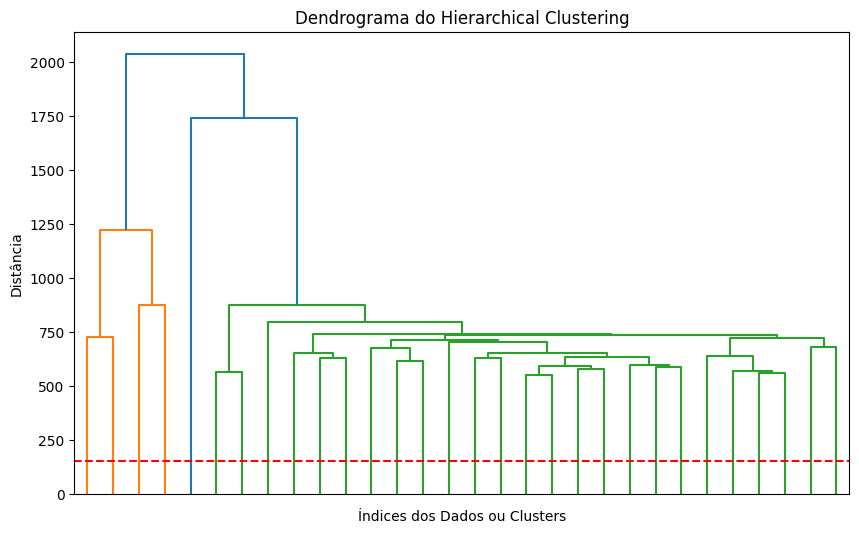

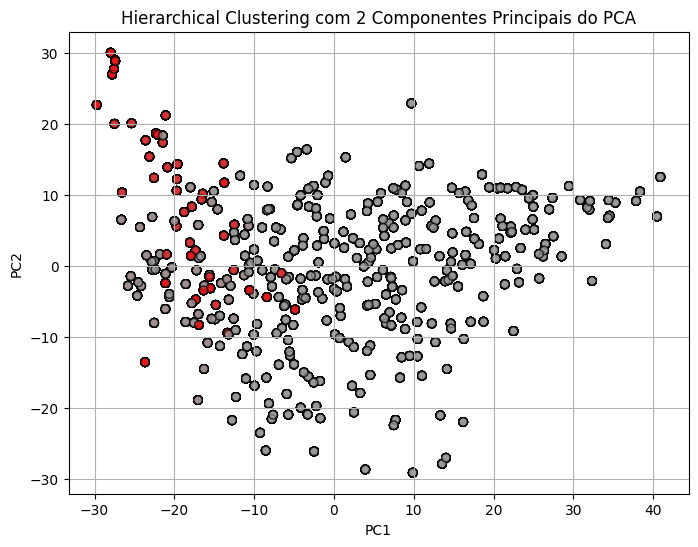

In [ ]:
# Reduzir os dados ao número necessário de componentes que explicam 90% da variância
reduced_data_hc = reduced_data[:, :n_components_90]

# Calcula a matriz de distância
distance_matrix = pdist(reduced_data_hc, metric='euclidean')

# Realiza o linkage (método 'ward' para minimização da variância intra-cluster)
linkage_matrix = linkage(distance_matrix, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_leaf_counts=False, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrograma do Hierarchical Clustering')
plt.xlabel('Índices dos Dados ou Clusters')
plt.ylabel('Distância')
plt.axhline(y=150, color='r', linestyle='--')  # Limite de corte (ajustar conforme os resultados)
plt.show()

# Definir o número de clusters cortando o dendrograma
n_clusters_hc = 2
hc_labels = fcluster(linkage_matrix, t=n_clusters_hc, criterion='maxclust')

# Adicionar os rótulos ao DataFrame original para análise posterior
df_final['HC_Labels'] = hc_labels

# Visualizar os clusters formados (2D scatter plot usando os 2 primeiros PCs)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hc_labels, cmap='Set1', edgecolor='k', alpha=0.7)
plt.title('Hierarchical Clustering com 2 Componentes Principais do PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()



##**Resultados**

O dendrograma sugere:

Dois grandes clusters principais, representados pelas duas maiores separações após cortar a linha vermelha (altura ≈ 150).
A alta distância entre os dois clusters (em torno de 2000 na escala do eixo Y) indica uma separação significativa em termos de similaridade. Portanto, as observações entre esses grupos são substancialmente diferentes.

**Interpretação Biológica:**

Os dois clusters podem estar representando:

Cluster 1: Combinações fármaco-alvo com maior especificidade ou afinidade por um subconjunto de proteínas quinases, devido à estrutura química/classe funcional dos fármacos.

Cluster 2: Combinações mais genéricas ou de menor afinidade, podendo incluir fármacos menos seletivos.

Tendo em conta a análise inicial --> Morgan Fingerprints (MF): Baixa variância (0.9941), o que sugere que os fármacos compartilham características estruturais similares.
Embeddings: Alta variância (1.0000), indicando maior diversidade nas características dos alvos proteicos.

Essa diferença pode justificar a formação dos clusters. Assim, o cluster que contém combinações mais diversas (alvos mais variáveis) pode ser relacionado aos embeddings (diversidade das proteínas). Já o cluster mais homogéneo em termos de Morgan Fingerprints reflete fármacos estruturalmente similares atuando em classes funcionais próximas.

## **3) Aprendizagem Máquina**


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [69]:
X = np.array([
    np.concatenate([drug_mf, embedding])
    for drug_mf, embedding in zip(df_final['Drug_MF'], df_final['Embeddings_Normalized'])
])

# A variável dependente 'Y'
y = df_final['Y'].values

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a serem avaliados
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

In [70]:
# Avaliar cada modelo
for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    predictions = model.predict(X_test)

    # Calcular métricas
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    # Exibir resultados
    print(f"Model: {model_name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print("="*50)

Model: Linear Regression
MAE: 0.4251456613015874
MSE: 0.4092649564926352
RMSE: 0.6397381937110174
R²: 0.3747917439071362
Model: Random Forest
MAE: 0.3522294093188655
MSE: 0.3404087043211522
RMSE: 0.5834455452920626
R²: 0.4799790966434999
Model: Gradient Boosting
MAE: 0.40556143876588846
MSE: 0.38915813023645945
RMSE: 0.62382540044187
R²: 0.4055076739660346
Model: Decision Tree
MAE: 0.40411705959515376
MSE: 0.659463346300593
RMSE: 0.8120734857761291
R²: -0.007420552766475463


###**Análise dos resultados técnicos:**
Os quatro modelos (Linear Regression, Random Forest, Gradient Boosting e Decision Tree) foram avaliados com métricas padrão de regressão: MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error) e R² (Coeficiente de Determinação).

**(a) Linear Regression:**
MAE: 0.4251; MSE: 0.4092; RMSE: 0.6397; R²: 0.3748
A regressão linear apresentou um desempenho razoável, com um erro relativamente baixo e um coeficiente de determinação R² de aproximadamente 37,5%. Isso indica que cerca de 37,5% da variância dos dados é explicada pelo modelo.

**(b) Random Forest:**
MAE: 0.3522; MSE: 0.3404; RMSE: 0.5834; R²: 0.4799
O Random Forest teve o melhor desempenho entre os modelos, com o menor MAE, MSE e RMSE, além de um R² de 48%. Isso sugere que o modelo conseguiu capturar padrões não-lineares e interações entre as variáveis.
Esse desempenho reforça a capacidade do Random Forest de lidar bem com dados complexos.

**(c) Gradient Boosting:**
MAE: 0.4056; MSE: 0.3892; RMSE: 0.6238; R²: 0.4055
O Gradient Boosting apresentou um desempenho intermédio, melhor que a Regressão Linear mas inferior ao Random Forest. O valor de R² indica que 40,6% da variância foi explicada.

**(d) Decision Tree:**
MAE: 0.4041; MSE: 0.6595; RMSE: 0.8121; R²: -0.0074
O Decision Tree apresentou o pior desempenho, com um R² negativo (-0,74%). Isso indica que ele mal conseguiu explicar a variância dos dados.
Árvores de decisão simples são mais propensas a overfitting e não generalizam bem quando os dados são complexos.

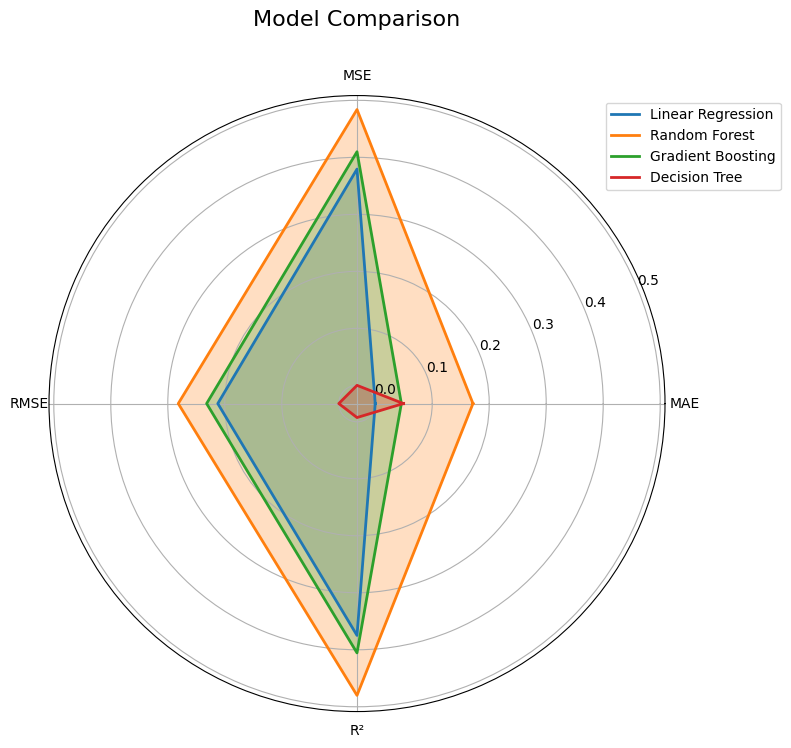

In [76]:
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "Decision Tree"],
    "MAE": [0.4251, 0.3522, 0.4056, 0.4041],
    "MSE": [0.4093, 0.3404, 0.3892, 0.6595],
    "RMSE": [0.6397, 0.5834, 0.6238, 0.8121],
    "R²": [0.3748, 0.4800, 0.4055, -0.0074]
}
df_results = pd.DataFrame(results)

# Normalizar as métricas para o radar (exceto R², pois pode ser negativo)
metrics = ["MAE", "MSE", "RMSE", "R²"]
values = df_results[metrics].values
values[:, :-1] = 1 - (values[:, :-1] / values[:, :-1].max(axis=0))  # Normalização

# Configurar o radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
values = np.concatenate([values, values[:, :1]], axis=1)  # Fechar o gráfico
angles += angles[:1]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, model in enumerate(df_results["Model"]):
    ax.plot(angles, values[i], label=model, linewidth=2)
    ax.fill(angles, values[i], alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_title("Model Comparison", fontsize=16, y=1.1)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

###**Random Forest como o modelo mais eficiente**
O Random Forest foi o modelo com o melhor desempenho, sugerindo que ele foi capaz de capturar melhor a relação entre os descritores moleculares, os embeddings e a variável dependente biológica.

**Interações complexas:** Sistemas biológicos muitas vezes dependem de interações não lineares entre múltiplas variáveis. O Random Forest consegue modelar essas interações sem precisar de suposições explícitas.

**Combinação de fingerprints e embeddings:** A inclusão de embeddings provavelmente aumentou a capacidade do modelo de identificar padrões mais sutis e relevantes, enquanto as fingerprints forneceram informações químicas objetivas.
No contexto biológico, isso sugere que o comportamento biológico do fármaco pode ser explicado por múltiplas características interativas e complexas.

**Aplicação prática:**
Estes resultados indicam que combinações de descritores químicos e embeddings são suficientes para prever com razoável precisão o desempenho de novos compostos. Este modelo poderia ser usado para triagem virtual, priorizando fármacos mais promissores para testes experimentais.

###**Gradient Boosting como modelo viável, mas menos robusto**
O Gradient Boosting apresentou resultados razoáveis, mas inferiores ao Random Forest. Isso pode ocorrer devido a:

Ruído nos dados: Sistemas biológicos podem conter variabilidade experimental, que afeta negativamente o Gradient Boosting, já que ele é mais sensível ao overfitting em comparação ao Random Forest;

Hiperparâmetros padrão: O modelo pode não ter sido ajustado de forma ideal, o que impacta a sua capacidade de aprendizagem em problemas com muitas variáveis.

Embora menos robusto que o Random Forest, o Gradient Boosting pode ser mais útil em contextos onde se procura alta performance após ajustes detalhados, como em otimização de formulações farmacológicas.

###**Desempenho limitado da Regressão Linear**
As relações entre as features moleculares/embeddings e a variável biológica são predominantemente não-lineares. A regressão linear não consegue capturar interações complexas entre os fatores químicos e as propriedades biológicas.

O desempenho limitado da regressão linear sugere que características mais simples (como descritores univariados) não são suficientes para descrever a variável biológica alvo.

###**Mau desempenho da Árvore de Decisão**
As possíveis causas incluem:

Overfitting: Uma única árvore de decisão é incapaz de generalizar bem, especialmente em dados biológicos que frequentemente são complexos e ruidosos;

Falta de robustez: A árvore de decisão não se beneficia do poder coletivo (ensemble) de várias árvores, como no caso do Random Forest.

Este modelo não é adequado para sistemas biológicos complexos e provavelmente não deve ser utilizado em estudos similares.



In [ ]:
# Validação cruzada
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=3, scoring='r2', n_jobs=-1)
    cv_results[model_name] = scores
    print(f"Modelo: {model_name}")
    print(f"R² Médio (Validação Cruzada): {scores.mean():.4f}")
    print(f"Desvio Padrão: {scores.std():.4f}")
    print("="*50)

Modelo: Linear Regression
R² Médio (Validação Cruzada): -5054612443565039835676672.0000
Desvio Padrão: 903926339386936070766592.0000
Modelo: Random Forest
R² Médio (Validação Cruzada): 0.0750
Desvio Padrão: 0.0946
Modelo: Gradient Boosting
R² Médio (Validação Cruzada): 0.0941
Desvio Padrão: 0.0558
Modelo: Decision Tree
R² Médio (Validação Cruzada): -0.4659
Desvio Padrão: 0.0096


####**Problemas técnicos com a Regressão Linear:**

O desempenho foi totalmente inviável devido a erros numéricos. Isso indica problemas com multicolinearidade ou escalas das variáveis.
Esse modelo deve ser descartado neste contexto.

####**Random Forest e Gradient Boosting têm potencial, mas precisam de ajustes:**

Ambos os modelos apresentaram desempenho positivo, mas inferior ao esperado, com indícios de overfitting.

- Ajustar hiperparâmetros para aumentar a generalização.
- Reduzir a complexidade do modelo (por exemplo, limitando a profundidade das árvores ou número de estimadores).
- Realizar uma análise de importância das variáveis para entender quais descritores moleculares e embeddings são mais relevantes.

####**Árvore de Decisão e Regressão Linear são inadequadas:**

Ambas as abordagens são incapazes de capturar os padrões necessários nos dados.


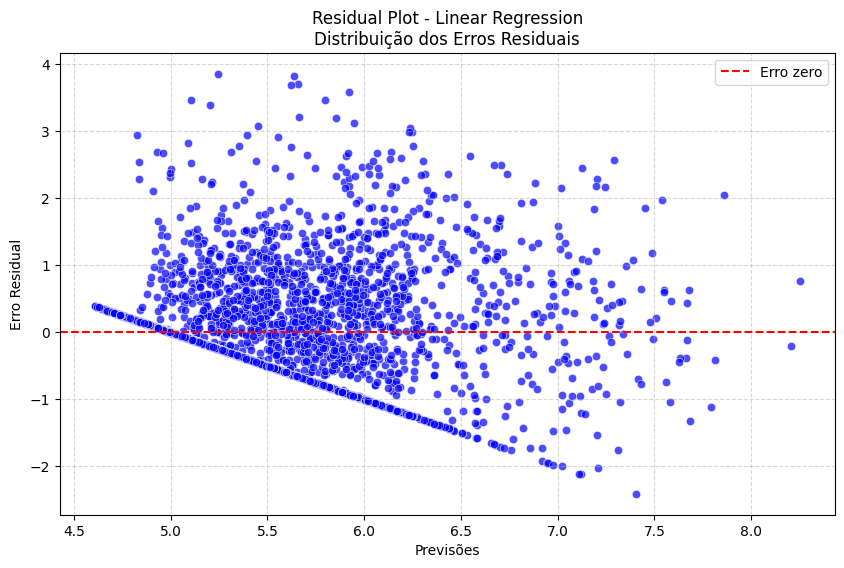

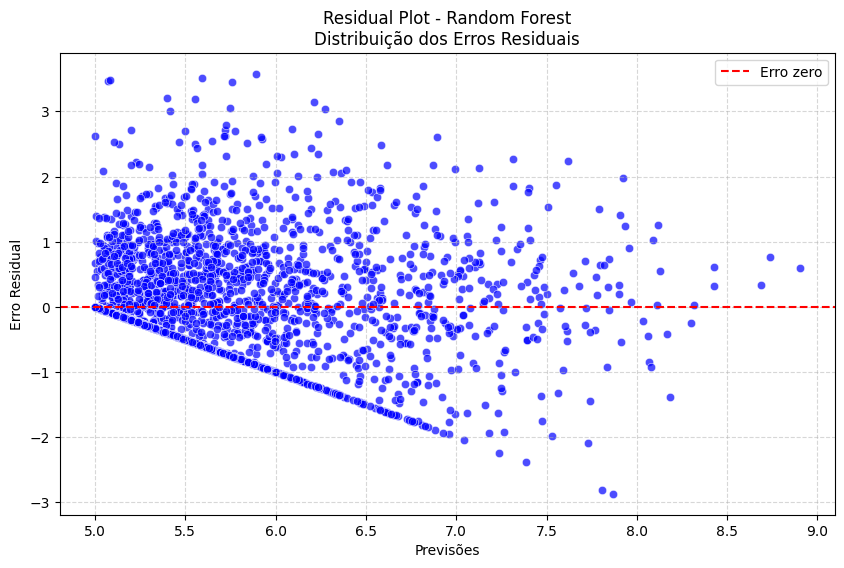

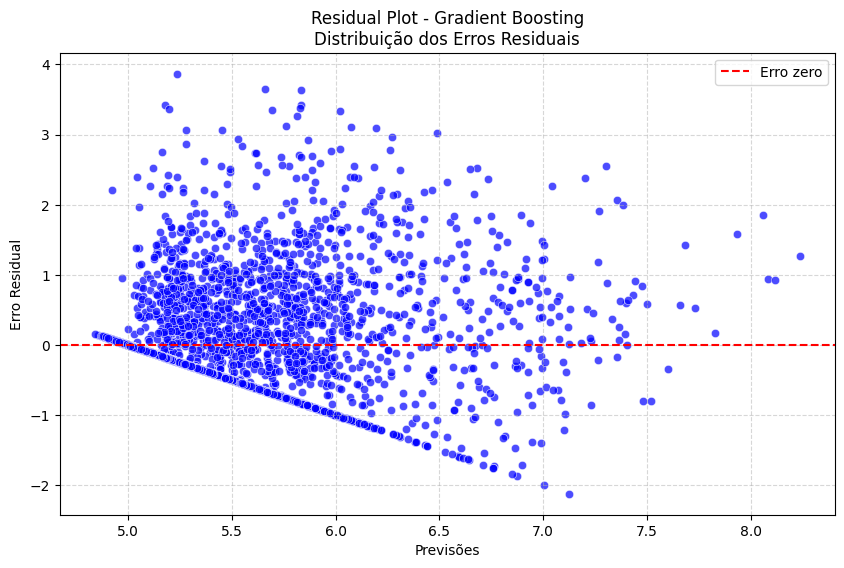

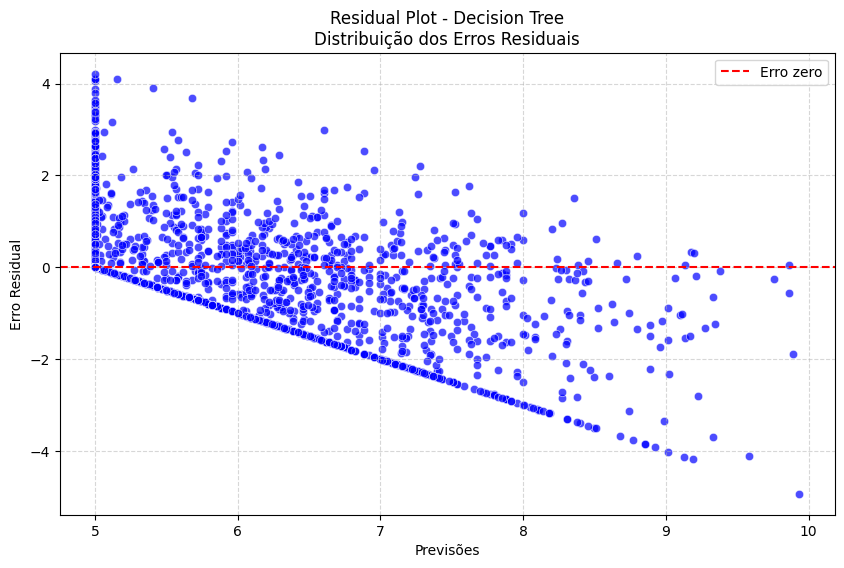

In [ ]:
# Gráfico de Erro Residual
for model_name, model in models.items():
    predictions = model.predict(X_test)
    residuals = y_test - predictions

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals, alpha=0.7, color='blue')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Erro zero')
    plt.title(f'Residual Plot - {model_name}\nDistribuição dos Erros Residuais')
    plt.xlabel('Previsões')
    plt.ylabel('Erro Residual')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


Os gráficos de residuos gerados acima mostram a relação entre as previsões feitas pelo modelo e os erros residuais e a linha vermelha indica o ponto onde os erros são zero, ou seja, quando o modelo previu o valor real.

### **Regressão Linear**


No que toca à distribuição, os resíduos apresentam um padrão inclinado, indicando tendência sistemática nos erros. O modelo não conseguiu capturar adequadamente a relação entre as variáveis independentes e o alvo. A dispersão aumenta para previsões maiores, o que demonstra que o modelo se torna menos preciso em algumas regiões; Tem um desempenho relativamente fraco, uma vez que o modelo é linear e a relação entre as variáveis parece ser mais complexa.

### **Random Forest**

A distribuição da maioria dos resíduos está concentrada em torno da linha de erro zero, indicando que o modelo fez previsões mais precisas para a maioria das observações. Apresenta um desempenho ligeiramente melhor do que a Regressão Linear, com boa capacidade de capturar relações não lineares, no entanto, os resíduos mostram que o modelo ainda não é perfeito.

### **Gradient Boosting**

Neste gráfico os erros residuais mostram uma distribuição com menor variabilidade para previsões próximas no intervalo de valores médios, mas com dispersão crescente para previsões mais altas, apresentando dificuldade em prever esses valores.

### **Decision Tree**

 Aqui, os erros também aumentam com o crescimento das previsões e tal como nos restantes demonstra limitações evidentes em capturar a variabilidade dos dados de forma contínua e precisa, especialmente para valores mais altos.




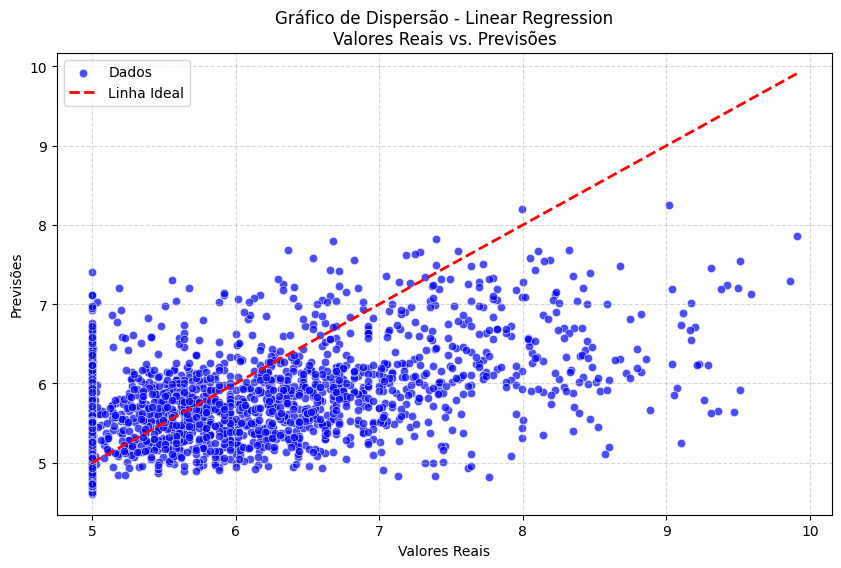

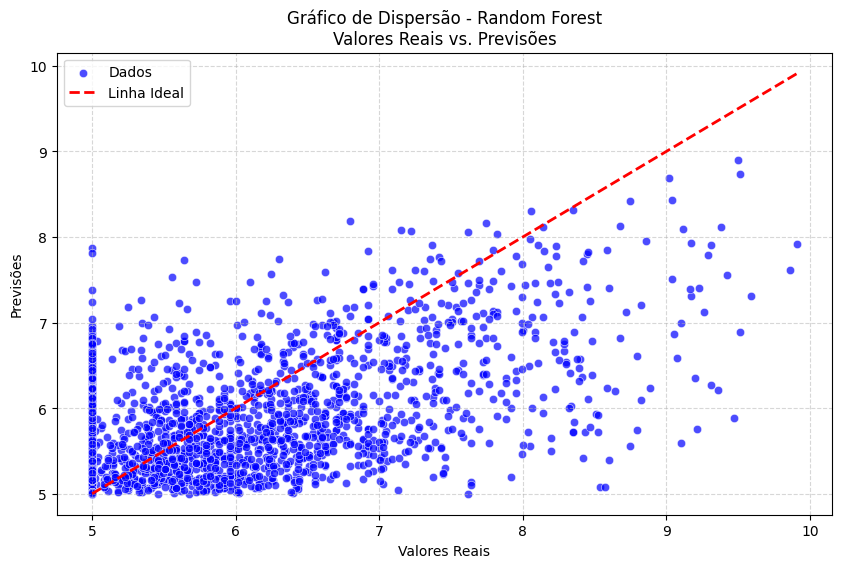

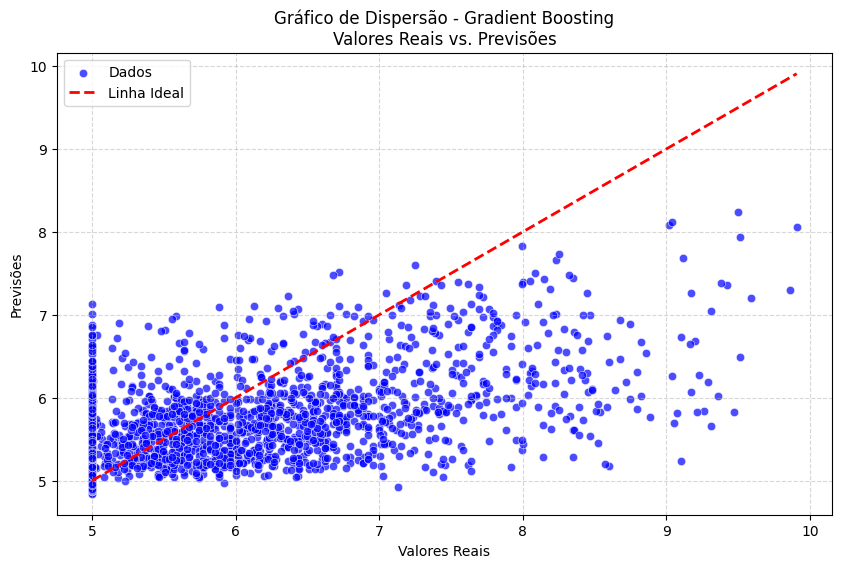

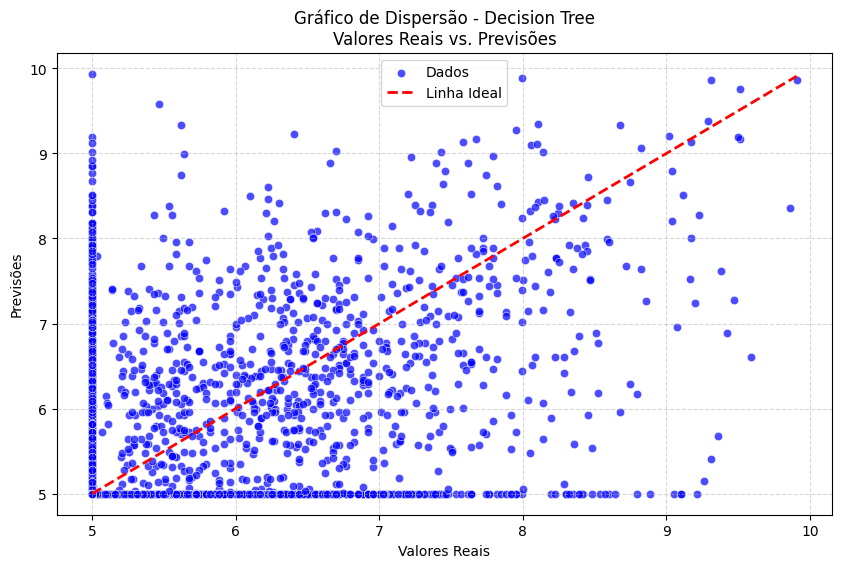

In [ ]:
# Gráfico de Dispersão (Previsões vs. Valores Reais)
for model_name, model in models.items():
    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7, color='blue', label='Dados')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Linha Ideal')
    plt.title(f'Gráfico de Dispersão - {model_name}\nValores Reais vs. Previsões')
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

Este gráfico de dispersão apresenta os valores reais no eixo X e as previsões do modelo de Regressão Linear no eixo Y. A linha vermelha tracejada representa a linha ideal, ou seja, onde os valores previstos seriam exatamente iguais aos valores reais.

Analisando os gráficos, nota-se que os pontos estão, de uma forma geral, concentrados em torno da linha ideal, especialmente para valores reais entre 5 e 7. Isso sugere que o modelo está a funcionar razoavelmente bem para essa faixa de valores. No entanto, existe alguma dispersão dos pontos ao longo da linha, indicando erros nas previsões. Para valores reais mais elevados (próximos a 9 ou 10), o modelo apresenta uma subestimação considerável, pois as previsões estão frequentemente abaixo da linha ideal.

Em resumo, o modelo de Regressão Linear funciona bem para valores médios, mas apresenta limitações em capturar a variabilidade para valores mais altos.


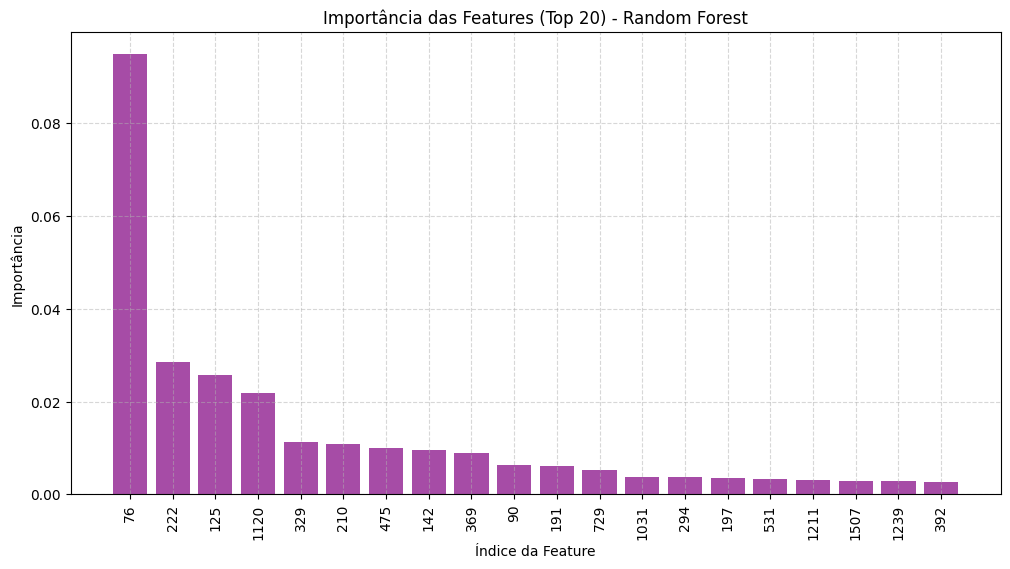

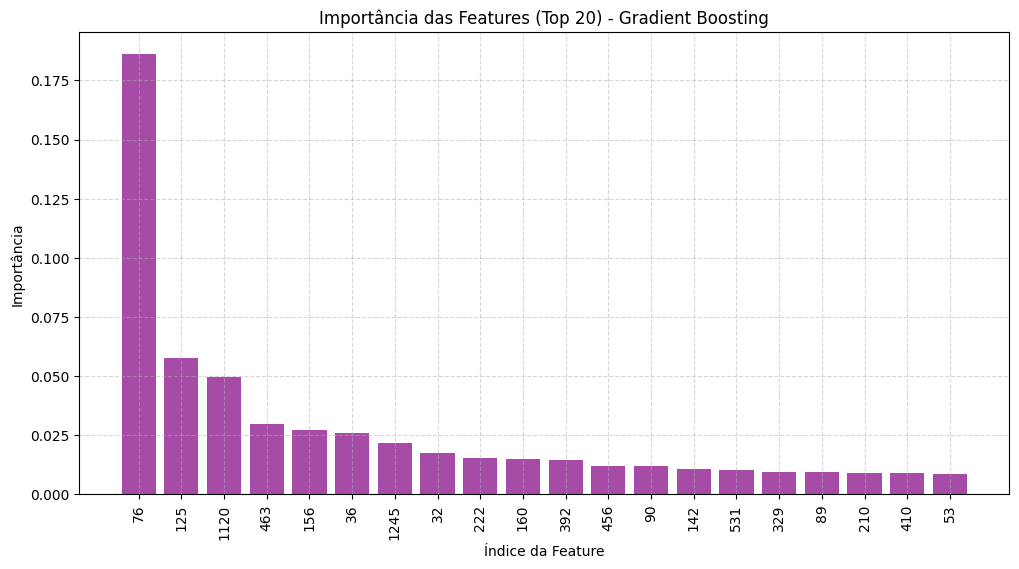

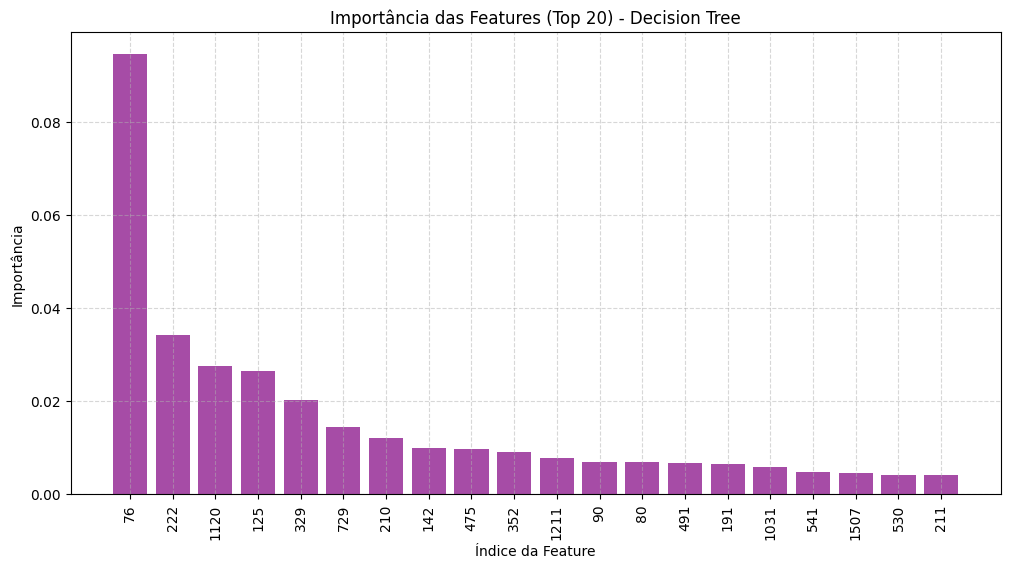

In [ ]:
# Mostrar apenas as principais 20 features mais importantes
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)[::-1]  # Ordenar pela importância

        # Selecionar as 20 principais
        top_n = 20
        top_features = sorted_idx[:top_n]
        top_importance = importance[top_features]

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(top_features)), top_importance, color='purple', alpha=0.7)
        plt.xticks(range(len(top_features)), top_features, rotation=90)
        plt.title(f'Importância das Features (Top {top_n}) - {model_name}')
        plt.xlabel('Índice da Feature')
        plt.ylabel('Importância')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()



Este código é utilizado para verificar e identificar as 20 features mais importantes nos modelos. O gráfico mostra essas 20 features principais em termos de índice, exibindo suas respectivas importâncias de forma visual. As barras representam os valores de importância atribuídos pelo modelo a cada feature.

Estes resultados ajudam a entender quais variáveis têm maior impacto nas previsões feitas pelo modelo, como é o caso da feature 76, que possui uma importância considerável nos 3 modelos. Esta análise também permite identificar variáveis pouco relevantes, que podem ser descartadas.

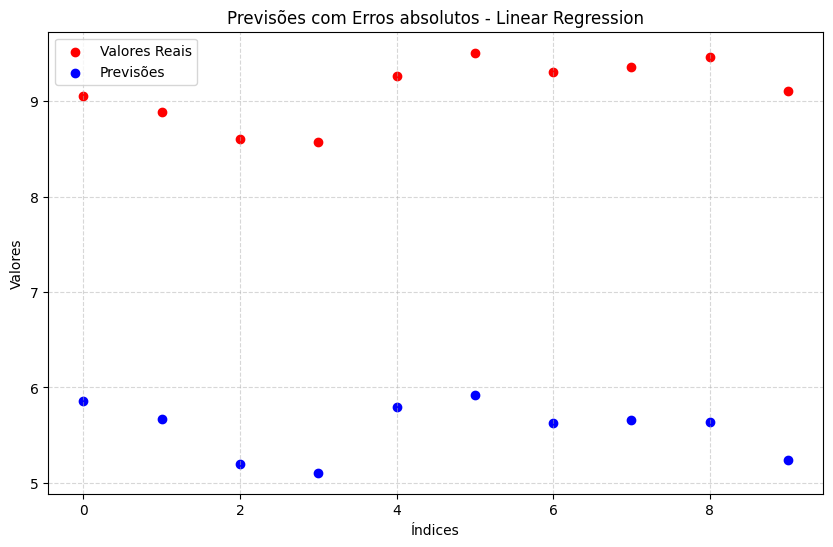

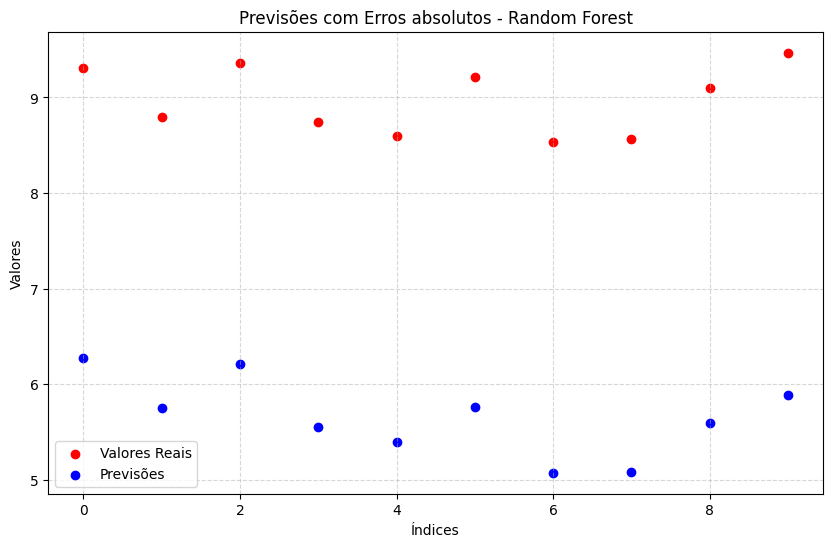

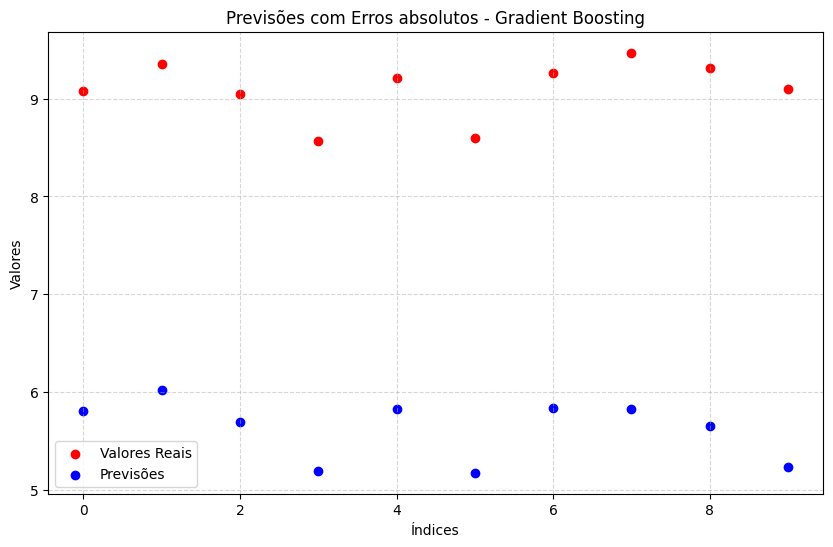

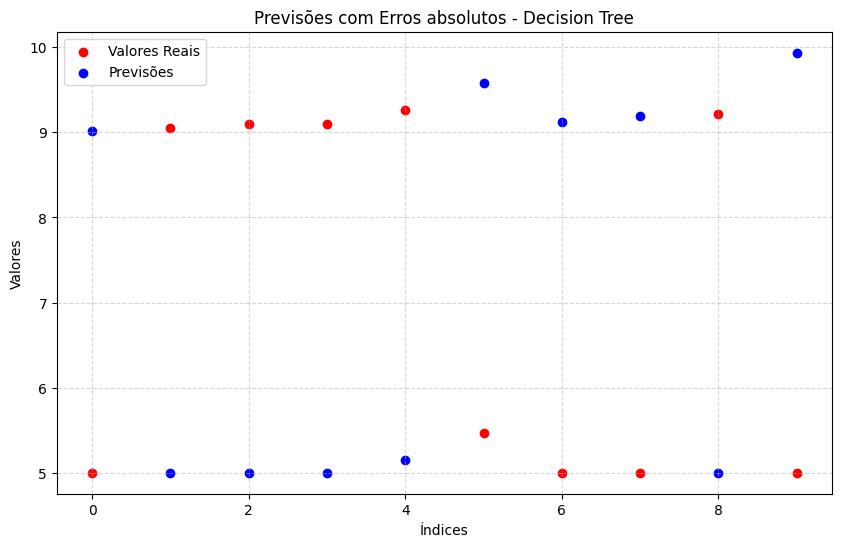

In [ ]:
# Previsões dos Erros Absolutos por Modelo
for model_name, model in models.items():
    predictions = model.predict(X_test)
    absolute_error = np.abs(y_test - predictions)

    # Identificar erros
    extreme_errors = np.argsort(absolute_error)[-10:]

    plt.figure(figsize=(10, 6))
    plt.scatter(range(10), y_test[extreme_errors], color='red', label='Valores Reais')
    plt.scatter(range(10), predictions[extreme_errors], color='blue', label='Previsões')
    plt.title(f'Previsões com Erros absolutos - {model_name}')
    plt.xlabel('Índices')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

Estes gráficos de dispersão comparam os valores reais (vermelho) e os valores previstos (azul). Em geral, os valores reais encontram-se constantemente mais altos que os previstos. Esta discrepância entre os valores indica que os modelos não estão a capturar de forma correta a relação entre as variáveis, resultando em erros ou previsões mais imprecisas.

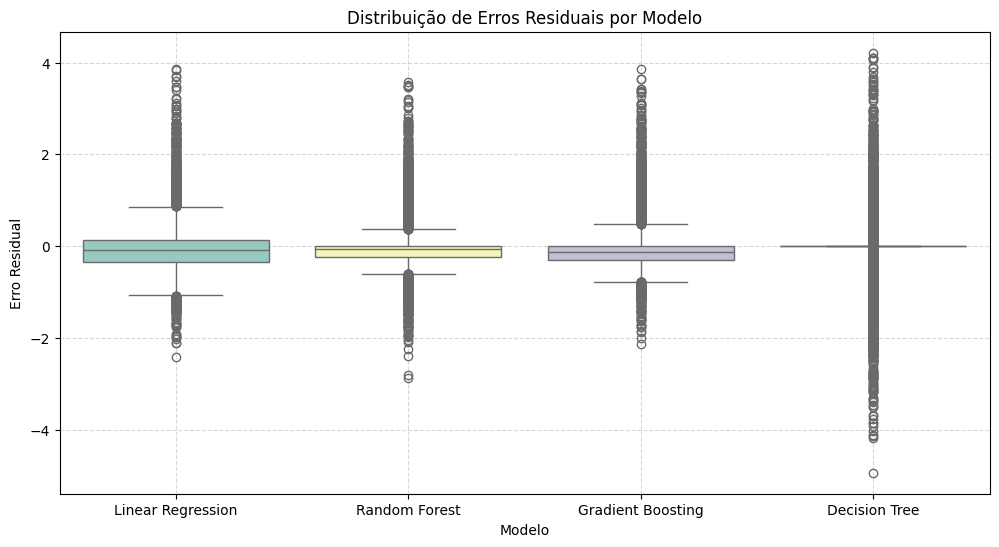

In [ ]:
# Recolhe erros residuais para cada modelo
residuals = {}
for model_name, model in models.items():
    predictions = model.predict(X_test)
    residuals[model_name] = y_test - predictions

# Transformar em DataFrame para visualização
residuals_df = pd.DataFrame(residuals)

# Boxplot dos erros residuais
plt.figure(figsize=(12, 6))
sns.boxplot(data=residuals_df, palette="Set3")
plt.title('Distribuição de Erros Residuais por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Erro Residual')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Realizou-se um boxplot para ajudar a visualizar a distribuição dos erros residuais para os quatro modelos, o que ajuda a comparar o desempenho de cada um.

Todos os modelos apresentam erro residual proximo de 0 o que indica que que têm preisões consistentes. Apesar disto, ainda apresentam alguns outliers, destacando o modelo Decision Tree. Este modelo é também aquele que apresenta menos variabilidades no erros residuais.



##**4) Deep Learning**
As técnicas de aprendizagem profunda oferecem uma alternativa poderosa aos modelos tradicionais de aprendizagem, tirando partido das arquitecturas de redes neuronais capazes de aprender padrões complexos e não lineares em dados de elevada dimensão. Esta secção explora a aplicação de métodos de aprendizagem profunda para prever a afinidade molecular, utilizando pré-processamento e conjuntos de caraterísticas semelhantes aos da Fase 3.

#### **4.2.1 Arquitetura do modelo**

Concebemos uma rede neural feedforward (FNN) adaptada à tarefa de previsão de afinidades. A arquitetura foi a seguinte:

- Camada de entrada: Aceita Morgan concatenadas fingerprints e embeddings de alvos.
- Camadas ocultas: Três camadas totalmente conectadas com funções de ativação ReLU.
- Camada 1: 512 neurónios
- Camada 2: 256 neurónios
- Camada 3: 128 neurónios
- Camada de saída: Um único neurónio com uma função de ativação linear para prever a afinidade.

#### **4.2.2 Parâmetros de treino**
- Função de perda: Erro médio quadrático (MSE)
- Optimizador: Optimizador Adam com uma taxa de aprendizagem de 0,001
- Tamanho do lote: 64
- Épocas: 50
- Divisão de validação: 20% dos dados de treino


#### **4.2.3 Métricas de avaliação**

Avaliámos o desempenho do modelo utilizando as mesmas métricas que na Fase 3:
- Pontuação R²
- Erro absoluto médio (MAE)
- Erro médio quadrático (MSE)
- Raiz do erro quadrático médio (RMSE)



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Conv1D, Dense, GlobalMaxPooling1D, concatenate

###FNN

In [ ]:
# Divisão dos dados
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Construir o modelo de Deep Learning
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Treinar o modelo
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 2.6533 - mae: 1.0509 - val_loss: 0.5844 - val_mae: 0.5368
Epoch 2/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5217 - mae: 0.5199 - val_loss: 0.4576 - val_mae: 0.4840
Epoch 3/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4293 - mae: 0.4698 - val_loss: 0.4026 - val_mae: 0.4408
Epoch 4/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3607 - mae: 0.4283 - val_loss: 0.4024 - val_mae: 0.4406
Epoch 5/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3355 - mae: 0.4191 - val_loss: 0.3900 - val_mae: 0.4423
Epoch 6/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3226 - mae: 0.4110 - val_loss: 0.3723 - val_mae: 0.4328
Epoch 7/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2901 - mae: 0.3878 - val_loss: 0.3900 - val_mae: 0.4458
Epoch 8/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2744 - mae: 0.3792 - val_loss: 0.3679 - val_mae: 0.4380
Epoch 9/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - l

In [ ]:
# Avaliação do modelo Deep Learning
y_pred_test_dl = model.predict(X_test_scaled).flatten()
y_pred_train_dl = model.predict(X_train_scaled).flatten()

# Calcular as métricas do modelo Deep Learning
metrics_dl = {
    "Training Set": {
        "R² Score": r2_score(y_train, y_pred_train_dl),
        "MAE": mean_absolute_error(y_train, y_pred_train_dl),
        "MSE": mean_squared_error(y_train, y_pred_train_dl),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train_dl))
    },
    "Test Set": {
        "R² Score": r2_score(y_test, y_pred_test_dl),
        "MAE": mean_absolute_error(y_test, y_pred_test_dl),
        "MSE": mean_squared_error(y_test, y_pred_test_dl),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test_dl))
    }
}

# Exibir as métricas do modelo Deep Learning
for dataset, metric_values in metrics_dl.items():
    print(f"\nMetrics for {dataset}:")
    for metric_name, value in metric_values.items():
        print(f"{metric_name}: {value:.4f}")



162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Metrics for Training Set:
R² Score: 0.9425
MAE: 0.1434
MSE: 0.0396
RMSE: 0.1990

Metrics for Test Set:
R² Score: 0.6069
MAE: 0.3350
MSE: 0.2754
RMSE: 0.5248


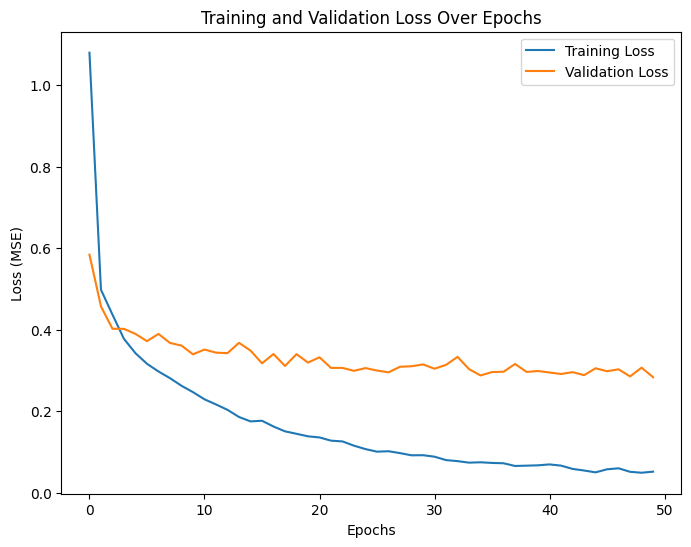

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

O gráfico mostra que a perda (loss) do treino e a validação diminuem significativamente nas primeiras épocas, indicando que o modelo está aprendendo de forma eficiente no início. A perda de treino continua a diminuir de forma consistente, atingindo valores baixos, enquanto a perda de validação apresenta flutuações e estabiliza-se num valor superior. Essa diferença crescente entre as perdas, especialmente após 20 épocas, sugere sinais de overfitting, onde o modelo ajusta-se excessivamente aos dados de treino e perde capacidade de generalização para os dados de validação.

Ajustes no dropout ou aumento da regularização podem ajudar a estabilizar o comportamento do conjunto de validação.

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


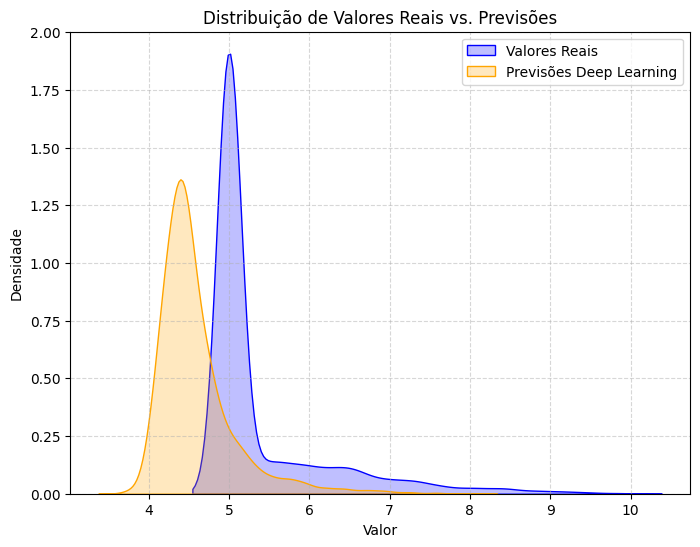

In [ ]:
#Distribuição das Previsões vs. Valores Reais
y_pred_dl = model.predict(X_test).flatten()

# Plotando a distribuição
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Valores Reais', shade=True, color='blue')
sns.kdeplot(y_pred_dl, label='Previsões Deep Learning', shade=True, color='orange')
plt.title('Distribuição de Valores Reais vs. Previsões')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- A curva laranja (previsões) tem uma concentração maior, indicando que o modelo tende a prever dentro de um intervalo mais estreito.
A curva azul (valores reais) apresenta uma maior dispersão, sugerindo que os dados reais têm mais variabilidade do que o modelo está conseguindo capturar.

- O deslocamento e a menor dispersão das previsões sugerem que o modelo pode estar sofrendo de **underfitting**, ou seja, ele não está capturando toda a complexidade dos dados reais.
Isso pode ocorrer devido a um modelo muito simples, falta de dados suficientes para treino, ou regularização excessiva.

- Há alguma sobreposição entre as distribuições, o que sugere que o modelo consegue capturar parte do padrão dos dados reais.

Assim sendo, decidimos fazer algumas melhorias, mudando certos parâmetros:

**Regularização:** A adição de dropout e regularização L2 ajuda a prevenir que o modelo se torne muito dependente de características específicas dos dados de treinamento.

**Benefícios do Dropout:**

O dropout é uma técnica essencial para melhorar a capacidade de generalização de redes neurais e reduzir o risco de overfitting. Durante o treino, o dropout desativa aleatoriamente uma fração dos neurônios de uma camada a cada iteração, o que força o modelo a não depender excessivamente de características específicas.

**Maior robustez do modelo:** Após o treino, o modelo aprende a utilizar todos os neurônios ativos em conjunto, tornando-o mais robusto ao trabalhar com novos dados.

Configurações como Dropout (0.3) indicam que 30% dos neurónios serão desativados aleatoriamente durante o treinamento, proporcionando um equilíbrio entre complexidade do modelo e capacidade de generalização.

In [ ]:
np.random.seed(42)

# Dividindo os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Construindo o modelo FNN com dropout e regularização L2
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

# Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Treinando o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Teste - Loss: {loss:.4f}, MAE: {mae:.4f}")


Epoch 1/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 8.1263 - mae: 1.5669 - val_loss: 4.1654 - val_mae: 1.0429
Epoch 2/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3.4092 - mae: 0.8118 - val_loss: 3.5189 - val_mae: 1.2271
Epoch 3/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.2389 - mae: 0.7125 - val_loss: 2.1156 - val_mae: 0.8621
Epoch 4/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.5801 - mae: 0.6515 - val_loss: 1.7037 - val_mae: 0.8314
Epoch 5/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.1927 - mae: 0.5912 - val_loss: 0.8257 - val_mae: 0.4892
Epoch 6/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.8557 - mae: 0.4892 - val_loss: 0.6813 - val_mae: 0.3884
Epoch 7/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7019 - mae: 0.4456 - val_loss: 0.6584 - val_mae: 0.3864
Epoch 8/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6495 - mae: 0.4348 - val_loss: 0.6533 - val_mae: 0.3943
Epoch 9/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - l

In [ ]:
# Fazendo previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculando as métricas
nn_metrics = {
    "Training Set": {
        "R² Score": r2_score(y_train, y_pred_train),
        "MAE": mean_absolute_error(y_train, y_pred_train),
        "MSE": mean_squared_error(y_train, y_pred_train),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train))
    },
    "Test Set": {
        "R² Score": r2_score(y_test, y_pred_test),
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }
}

# Exibindo as métricas
for dataset, metric_values in nn_metrics.items():
    print(f"\nMetrics for {dataset}:")
    for metric_name, value in metric_values.items():
        print(f"{metric_name}: {value:.4f}")

484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Metrics for Training Set:
R² Score: 0.3936
MAE: 0.4045
MSE: 0.4175
RMSE: 0.6462

Metrics for Test Set:
R² Score: 0.3642
MAE: 0.4176
MSE: 0.4454
RMSE: 0.6674


- Os valores de loss e MAE para treino e validação são mais próximos;

- Menor variação entre loss de treino e validação
- Indicação de melhor generalização comparado ao modelo anterior

Conclusão: O modelo com dropout apresenta um treino mais estável e uma capacidade de generalização potencialmente melhor.

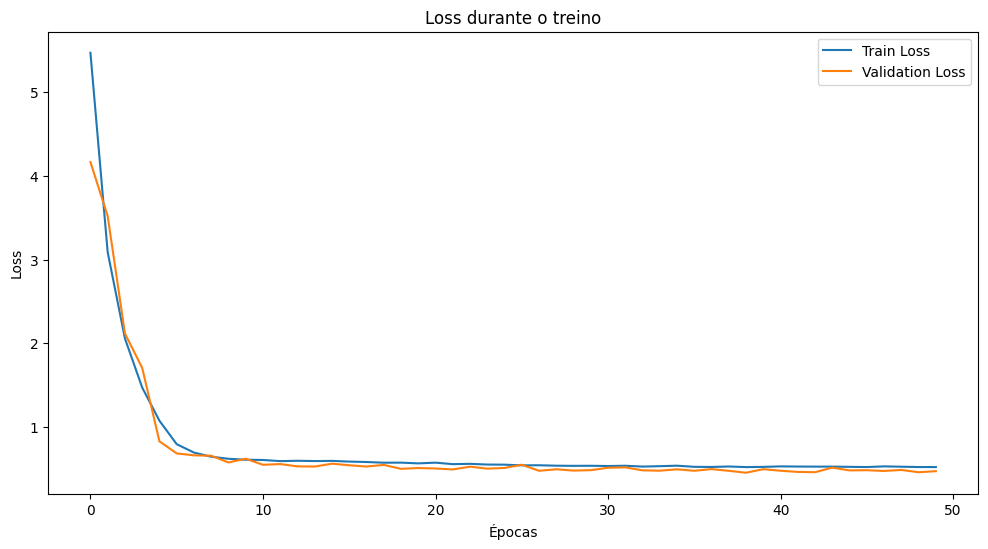

In [ ]:
# Visualizando o histórico de aprendizado
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante o treino')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

O gráfico mostra que a perda (loss) do treino e da validação diminui rapidamente nas primeiras épocas, indicando que o modelo aprende de forma eficiente no início do treinamento. Após cerca de 20 épocas, ambas as curvas  estabilizam-se próximas a valores baixos, o que sugere que o modelo atingiu um bom ponto de convergência. Uma vez que as curvas de perda de treino e validação estão muito próximas, temos a indicação de que o modelo generaliza bem para os dados de validação.

Após a aplicação do Feedforward Neural Network (FNN), procuramos capturar padrões complexos e representações não lineares presentes nos dados. O FNN, sendo um modelo robusto e flexível, é capaz de aprender relações intrínsecas que modelos tradicionais podem não identificar de forma eficaz. Este processo transforma os dados numa nova representação, onde características relevantes e estruturais tornam-se mais evidentes.

Ao utilizar o FNN como uma etapa de pré-processamento/transformação, garantimos que os dados sejam representados num espaço de menor dimensão ou enriquecidos com informações mais expressivas. Isso facilita a aprendizagem em etapas subsequentes, especialmente ao combinar a capacidade de generalização do FNN com a habilidade do Gradient Boosting de explorar padrões residuais nos dados transformados.

O objetivo desta abordagem híbrida é obter o melhor de ambos os mundos: a extração de características profundas pelo FNN e a capacidade do Gradient Boosting de otimizar previsões ao focar nos erros residuais.



###Gradient Bosting

In [ ]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,      # Número de árvores
    learning_rate=0.1,
    max_depth=5,           # Profundidade máxima das árvores
    random_state=42
)

gb_model.fit(X_train, y_train)

#previsões
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

#métricas de desempenho
gb_metrics = {
    "Training Set": {
        "R² Score": r2_score(y_train, y_pred_train_gb),
        "MAE": mean_absolute_error(y_train, y_pred_train_gb),
        "MSE": mean_squared_error(y_train, y_pred_train_gb),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train_gb))
    },
    "Test Set": {
        "R² Score": r2_score(y_test, y_pred_test_gb),
        "MAE": mean_absolute_error(y_test, y_pred_test_gb),
        "MSE": mean_squared_error(y_test, y_pred_test_gb),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
    }
}


for dataset, metric_values in gb_metrics.items():
    print(f"\nMetrics for {dataset}:")
    for metric_name, value in metric_values.items():
        print(f"{metric_name}: {value:.4f}")


Metrics for Training Set:
R² Score: 0.6504
MAE: 0.3169
MSE: 0.2407
RMSE: 0.4906

Metrics for Test Set:
R² Score: 0.4710
MAE: 0.3860
MSE: 0.3706
RMSE: 0.6088


Neste contexto, o modelo apresentou um bom desempenho, com um R² de 0.6504 no conjunto de treino e 0.4710 no conjunto de teste, sugerindo uma generalização razoável. As métricas de erro, como MAE e RMSE, também indicam um bom desempenho na previsão dos valores.

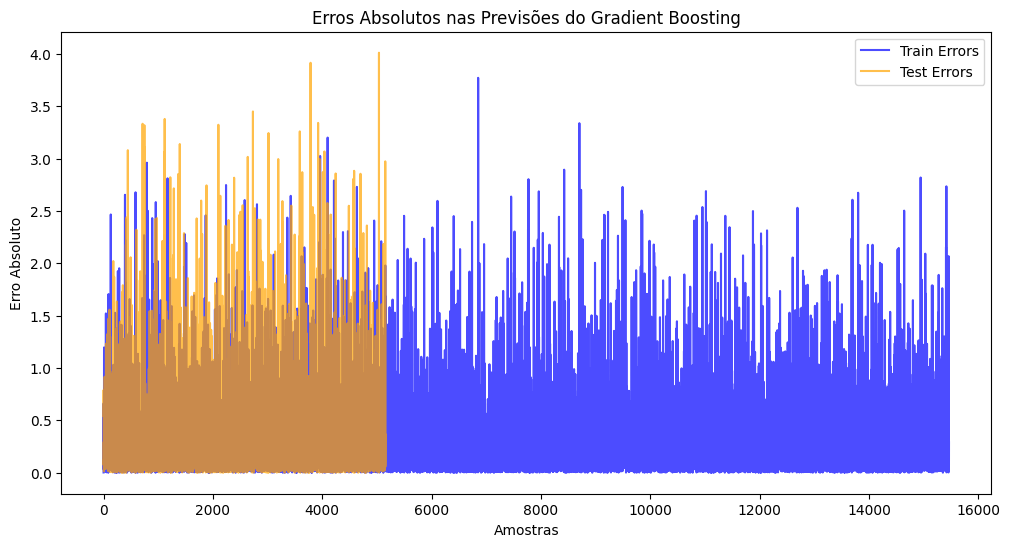

In [ ]:
# Calculando o erro absoluto
train_errors = np.abs(y_train - y_pred_train_gb)
test_errors = np.abs(y_test - y_pred_test_gb)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(train_errors, label='Train Errors', color='blue', alpha=0.7)
plt.plot(test_errors, label='Test Errors', color='orange', alpha=0.7)
plt.title('Erros Absolutos nas Previsões do Gradient Boosting')
plt.xlabel('Amostras')
plt.ylabel('Erro Absoluto')
plt.legend()
plt.show()

O modelo apresenta uma boa performance no treino (menores erros), mas há variação maior nos erros no conjunto de teste.
Isso é esperado em modelos de Gradient Boosting, especialmente se o conjunto de teste possui características diferentes ou ruído.

Fizemos ainda uma última análise, recorrendo ao uso de **Redes Neurais Convolucionais (CNNs)**, que é justificado neste contexto de análise de afinidade de ligação fármaco-alvo devido à sua capacidade de extrair características relevantes de dados sequenciais, como as sequências de proteínas e fármacos.

As CNNs são particularmente adequadas para processar dados estruturados, como sequências de aminoácidos em proteínas ou representações SMILES de drogas. Elas podem identificar padrões locais e hierárquicos nessas sequências, que são cruciais para determinar a afinidade de ligação (https://doi.org/10.1093/bioinformatics/bty593). Além disso, as CNNs têm a vantagem de aprender representações diretamente dos dados brutos, eliminando a necessidade de extração manual de características.

Portanto, o uso de CNNs neste contexto promete uma abordagem mais eficaz e precisa para a previsão de afinidade de ligação fármaco-alvo, potencialmente levando a avanços significativos no desenvolvimento de medicamentos e no tratamento de doenças.

In [ ]:
# Preparação dos dados
X_drug = np.array(df_final['Drug_MF'].tolist())
X_protein = np.array(df_final['Embeddings_Normalized'].tolist())
y = df_final['Y'].values

# Divisão dos dados
X_protein_train, X_protein_temp, X_drug_train, X_drug_temp, y_train, y_temp = train_test_split(
    X_protein, X_drug, y, test_size=0.4, random_state=42)
X_protein_val, X_protein_test, X_drug_val, X_drug_test, y_val, y_test = train_test_split(
    X_protein_temp, X_drug_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Função para criar um bloco CNN
def create_cnn_block(input_shape, name):
    inputs = Input(shape=input_shape, name=f'{name}_input')
    x = Conv1D(32, 3, activation='relu', padding='same')(inputs)
    x = Conv1D(64, 3, activation='relu', padding='same')(x)
    x = GlobalMaxPooling1D()(x)
    return Model(inputs, x, name=f'{name}_cnn')

# Criar blocos CNN para proteínas e fármacos
protein_cnn = create_cnn_block((X_protein_train.shape[1], 1), 'protein')
drug_cnn = create_cnn_block((X_drug_train.shape[1], 1), 'drug')

# Combinar os blocos CNN
protein_input = Input(shape=(X_protein_train.shape[1], 1), name='protein_input')
drug_input = Input(shape=(X_drug_train.shape[1], 1), name='drug_input')

protein_features = protein_cnn(protein_input)
drug_features = drug_cnn(drug_input)

combined = concatenate([protein_features, drug_features])

# Adicionar camadas densas
x = Dense(128, activation='relu')(combined)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear')(x)

# Criar o modelo final
model = Model(inputs=[protein_input, drug_input], outputs=output)

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [ ]:
# Treinar o modelo
history = model.fit(
    [X_protein_train.reshape(-1, X_protein_train.shape[1], 1),
     X_drug_train.reshape(-1, X_drug_train.shape[1], 1)],
    y_train,
    validation_data=([X_protein_val.reshape(-1, X_protein_val.shape[1], 1),
                      X_drug_val.reshape(-1, X_drug_val.shape[1], 1)],
                     y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 54s 98ms/step - loss: 3.6266 - mae: 1.2167 - val_loss: 0.6291 - val_mae: 0.5414
Epoch 2/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - loss: 0.6842 - mae: 0.5766 - val_loss: 0.7794 - val_mae: 0.7840
Epoch 3/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - loss: 0.6701 - mae: 0.5829 - val_loss: 0.6717 - val_mae: 0.6968
Epoch 4/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - loss: 0.6388 - mae: 0.5568 - val_loss: 0.5996 - val_mae: 0.6086
Epoch 5/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - loss: 0.6350 - mae: 0.5591 - val_loss: 0.5705 - val_mae: 0.5638
Epoch 6/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - loss: 0.6360 - mae: 0.5552 - val_loss: 0.7435 - val_mae: 0.7596
Epoch 7/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - loss: 0.6644 - mae: 0.5681 - val_loss: 0.5765 - val_mae: 0.5914
Epoch 8/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - loss: 0.6207 - mae: 0.5495 - val_loss: 0.6259 - val_mae: 0.6592
Epoch 9/50
484/484 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Avaliação do modelo
y_pred_test = model.predict([X_protein_test.reshape(-1, X_protein_test.shape[1], 1),
                             X_drug_test.reshape(-1, X_drug_test.shape[1], 1)]).flatten()
y_pred_train = model.predict([X_protein_train.reshape(-1, X_protein_train.shape[1], 1),
                              X_drug_train.reshape(-1, X_drug_train.shape[1], 1)]).flatten()

# Calcular as métricas do modelo
metrics = {
    "Training Set": {
        "R² Score": r2_score(y_train, y_pred_train),
        "MAE": mean_absolute_error(y_train, y_pred_train),
        "MSE": mean_squared_error(y_train, y_pred_train),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train))
    },
    "Test Set": {
        "R² Score": r2_score(y_test, y_pred_test),
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }
}

# Exibir as métricas do modelo
for dataset, metric_values in metrics.items():
    print(f"\nMetrics for {dataset}:")
    for metric_name, value in metric_values.items():
        print(f"{metric_name}: {value:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step
484/484 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step

Metrics for Training Set:
R² Score: 0.3291
MAE: 0.5071
MSE: 0.4619
RMSE: 0.6797

Metrics for Test Set:
R² Score: 0.2899
MAE: 0.5256
MSE: 0.4975
RMSE: 0.7053


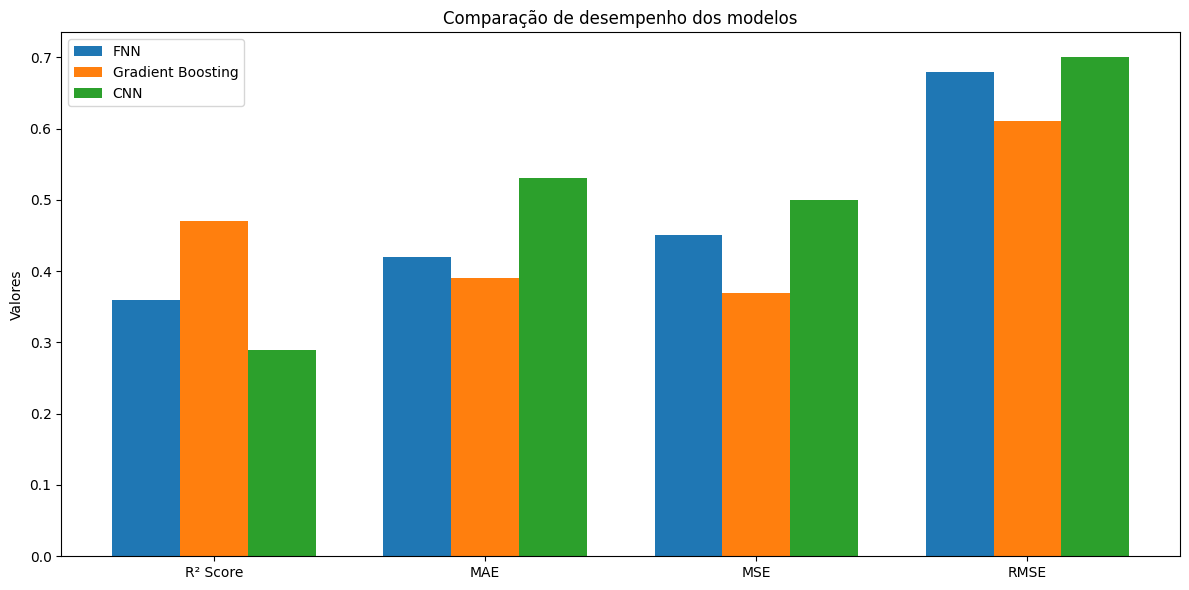

In [ ]:
# Visualizar o desempenho dos diferentes modelos
# Dados de desempenho
models = ['FNN', 'Gradient Boosting', 'CNN']
metrics = ['R² Score', 'MAE', 'MSE', 'RMSE']

performance = {
    'FNN': [0.36, 0.42, 0.45, 0.68],  # R², MAE, MSE, RMSE
    'Gradient Boosting': [0.47, 0.39, 0.37, 0.61],
    'CNN': [0.29, 0.53, 0.50, 0.70]
}

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(models):
    ax.bar(x + i*width, performance[model], width, label=model)

ax.set_ylabel('Valores')
ax.set_title('Comparação de desempenho dos modelos')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

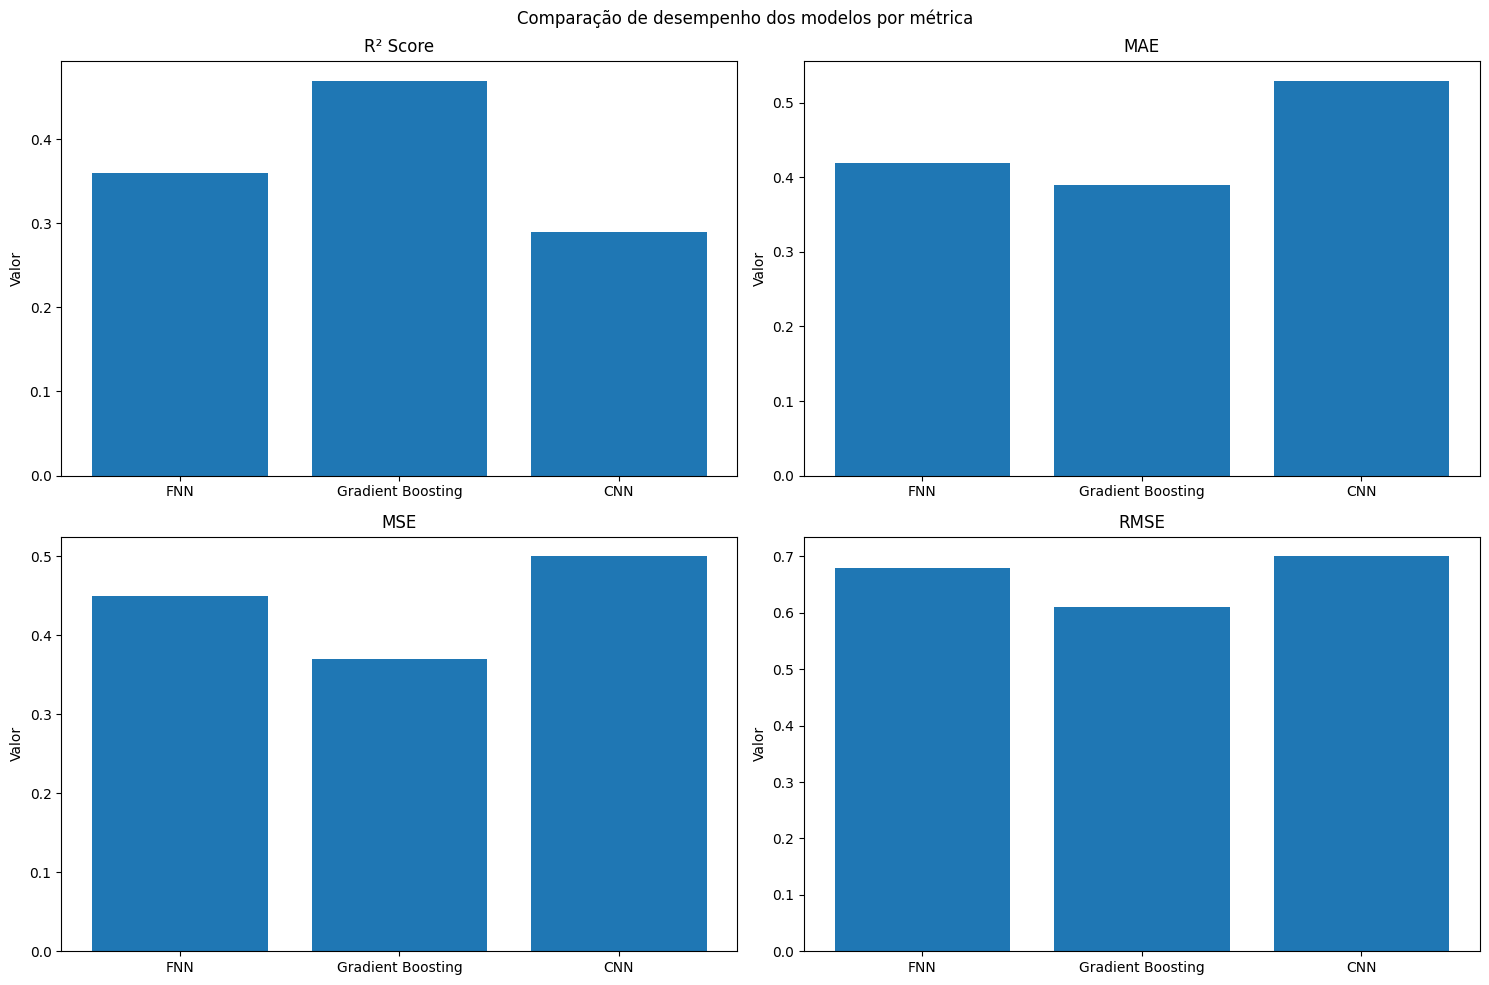

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparação de desempenho dos modelos por métrica')

for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    values = [performance[model][i] for model in models]
    ax.bar(models, values)
    ax.set_title(metric)
    ax.set_ylabel('Valor')

plt.tight_layout()
plt.show()

**R² Score**

O modelo FNN apresenta o maior R² Score, indicando que ele é o mais eficaz em explicar a variância dos dados. Já o Gradient Boosting e o CNN possuem valores de R² inferiores, sugerindo que não conseguem capturar tão bem a variabilidade global dos dados em comparação ao FNN.

**MAE (Mean Absolute Error)**

O CNN possui o menor MAE, o que mostra que, em média, as suas previsões estão mais próximas dos valores reais. O Gradient Boosting apresenta o maior MAE, indicando que suas previsões possuem maior erro absoluto médio, enquanto o FNN ocupa uma posição intermediária.

**MSE (Mean Squared Error)**

O FNN possui o menor MSE, o que sugere que é mais eficaz em minimizar grandes erros, que são amplificados pelo cálculo do MSE. Por outro lado, o CNN apresenta o maior MSE, indicando maior sensibilidade a erros maiores, enquanto o Gradient Boosting permanece num ponto intermediário.

**RMSE (Root Mean Squared Error)**

Como esperado, o comportamento do RMSE reflete o do MSE. O FNN apresenta o menor RMSE, indicando maior precisão ao lidar com erros grandes, enquanto o CNN tem o maior RMSE.

**Considerações:**

FNN: Mostrou-se o modelo mais eficaz em termos de variância explicada (R²), penalização para grandes erros (MSE) e erros gerais (RMSE). Porém, ainda perde com o CNN em termos de erros absolutos médios (MAE);

CNN: Destaca-se por apresentar o menor MAE, sugerindo que é capaz de fazer previsões mais próximas dos valores reais, mesmo que seja mais sensível a grandes erros;

Gradient Boosting: Mostra desempenho competitivo em algumas métricas, mas apresenta o maior MAE, o que pode limitar a sua aplicabilidade em certos cenários.


**Interpretação biológica:**

O desempenho superior do FNN em termos de R² Score e MSE sugere que ele consegue capturar melhor a variabilidade global das interações entre proteínas e fármacos. No entanto, o menor MAE do CNN aponta para a sua eficácia em identificar padrões locais, como interações específicas entre grupos químicos e regiões da proteína.

**Design de novos fármacos:**

O CNN pode ser especialmente útil no design de fármacos ao identificar padrões locais relevantes, como hotspots em proteínas ou grupos químicos específicos que maximizam interações. Por outro lado, o FNN, com a sua maior capacidade de capturar a variância global, pode fornecer insights complementares ao identificar tendências globais na interação proteína-fármaco.

**Conclusão**

Embora o CNN mostre potencial para capturar padrões locais importantes no design racional de medicamentos, os resultados gerais indicam que o FNN  destaca-se na explicação da variância e minimização de erros maiores. Ambos os modelos podem ser utilizados de forma complementar, dependendo do objetivo específico da análise biológica e do design de novos fármacos.

# **References:**

 - Davis, M., Hunt, J., Herrgard, S. et al. Comprehensive analysis of kinase inhibitor selectivity. Nat Biotechnol 29, 1046–1051 (2011).

- Santos, Rita, et al. "A comprehensive map of molecular drug targets." Nature reviews Drug discovery 16.1 (2017): 19-34.

- Zitnik, Marinka, et al. "Machine learning for integrating data in biology and medicine: Principles, practice, and opportunities." Information Fusion 50 (2019): 71-91.

- Lee, Ingoo, Jongsoo Keum, and Hojung Nam. "DeepConv-DTI: Prediction of drug-target interactions via deep learning with convolution on protein sequences." PLoS computational biology 15.6 (2019): e1007129.

- Huang, Kexin, et al. "DeepPurpose: a deep learning library for drug–target interaction prediction." Bioinformatics 36.22-23 (2020): 5545-5547.

- Zhong, Shifa and Guan, Xiaohong. "Count-Based Morgan Fingerprint: A More Efficient and Interpretable Molecular Representation in Developing Machine Learning-Based Predictive Regression Models for Water Contaminants’ Activities and Properties". Environmental Science & Technology (2023). https://pubs.acs.org/doi/10.1021/acs.est.3c02198.